<a id="title"></a>
# Synthetic Photometry Examples for WFC3
<hr>
## Learning Goals

By the end of this tutorial, you will: 

- Specify WFC3 bandpasses in `stsynphot` and define spectra with `synphot`.
- Compute WFC3 zeropoint values and an encircled energy correction.
- Renormalize a spectrum and predict its effective stimulus in another filter.
- Find the photometric transformation between two bandpasses.
- Find the UV color term across the two UVIS chips for different spectral types.
- Plot bandpasses and spectra.

## Table of Contents

[Introduction](#intro) <br>
[1. Imports](#imports) <br>
[2. Bandpasses and spectra](#band_spec) <br>
- [2.1 Set up bandpasses](#band) <br>
- [2.2 Define spectra](#spec) <br>

[3. Examples](#ex) <br>
- [Example 1a: Compute the inverse sensitivity and zeropoint](#e1) <br>
- [Example 1b: Compute an encircled energy correction](#e1b) <br>
- [Example 2:  Renormalize a spectrum and predict its effective stimulus in another filter](#e2) <br>
- [Example 3:  Find the photometric transformation between two bandpasses](#e3) <br>
- [Example 4a: Find the UV color term across the two UVIS chips for different spectral types](#e4) <br>
- [Example 4b: Plot bandpasses and spectra](#e4b)

[4. Conclusions](#conclusion) <br>
[Additional Resources](#resources) <br>
[About the Notebook](#about) <br>
[Citations](#cite) <br>

<a id="intro"></a>
## Introduction

This notebook contains several examples of how to use the `synphot` and `stsynphot` modules for various photometric purposes. 

`synphot` is a Python module that facilitates synthetic photometry, which has an extension module called `stsynphot` to add support for STScI missions. `synphot` is meant to be a replacement for AstroLib `pysynphot`. 

Examples 1, 2, and 3 are based on those found in Section 9.1.10 of the 2018 version of the WFC3 Data Handbook. 

`stsynphot` requires access to data distributed by the [Calibration Data Reference System](https://hst-crds.stsci.edu/) (CRDS) in order to operate. Both packages look for an environment variable called `PYSYN_CDBS` to find the directory containing these data.

Users can obtain these data files from the CDRS. Information on how to obtain the most up-to-date reference files (and what they contain) can be found [here](https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/synphot-throughput-tables). An example of how to download the files with `curl` and set up this environment variable is presented below.

For detailed instructions on how to install and set up these packages, see the [synphot](https://synphot.readthedocs.io/en/latest/#installation-and-setup) and [stsynphot](https://stsynphot.readthedocs.io/en/latest/#installation-and-setup) documentation.

<a id="imports"></a>
## 1. Imports

This notebook assumes you have created the virtual environment in [WFC3 Library's](https://github.com/spacetelescope/WFC3Library) installation instructions.

We import:
- *os* for setting environment variables

- *numpy* for handling array functions
- *matplotlib.pyplot* for plotting data

- *synphot* and *stsynphot* for evaluating synthetic photometry
- *astropy.units* and *synphot.units* for handling units

Additionally, we will need to set the `PYSYN_CDBS` environment variable *before* importing stsynphot. We will also create a Vega spectrum using synphot's inbuilt `from_vega()` method, as the latter package will supercede this method's functionality and require a downloaded copy of the latest Vega spectrum to be provided.

In [1]:
%matplotlib inline

import os
import tarfile

import numpy as np
import matplotlib.pyplot as plt

import synphot as syn

from astropy import units as u
from synphot import units as su

vegaspec = syn.SourceSpectrum.from_vega()

This section obtains the WFC3 throughput component tables for use with `stsynphot`. This step only needs to be done once. If these reference files have already been downloaded, this section can be skipped.

In [2]:
!curl -O https://archive.stsci.edu/hlsps/reference-atlases/hlsp_reference-atlases_hst_multi_everything_multi_v11_sed.tar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0  796M    0  496k    0     0   778k      0  0:17:26 --:--:--  0:17:26  778k

  0  796M    0 6592k    0     0  3991k      0  0:03:24  0:00:01  0:03:23 3990k

  1  796M    1 8432k    0     0  3169k      0  0:04:17  0:00:02  0:04:15 3168k

  1  796M    1 9264k    0     0  2548k      0  0:05:19  0:00:03  0:05:16 2548k

  1  796M    1  9.7M    0     0  2157k      0  0:06:17  0:00:04  0:06:13 2157k

  1  796M    1 10.4M    0     0  1896k      0  0:07:09  0:00:05  0:07:04 2038k

  1  796M    1 11.2M    0     0  1738k      0  0:07:49  0:00:06  0:07:43  994k

  1  796M    1 12.1M    0     0  1623k      0  0:08:22  0:00:07  0:08:15  802k

  1  796M    1 13.2M    0     0  1566k      0  0:08:40  0:00:08  0:08:32  851k

  1  796M    1 14.5M    0     0  1540k      0  0:08:49  0:00:09  0:08:40  973k

  1  796M    1 15.7M    0     0  1511k      0  0:08:59  0:00:10  0:08:49 1076k

  2  796M    2 16.7M    0     0  1473k      0  0:09:13  0:00:11  0:09:02 1120k

  2  796M    2 17.5M    0     0  1421k      0  0:09:33  0:00:12  0:09:21 1110k

  2  796M    2 18.3M    0     0  1375k      0  0:09:52  0:00:13  0:09:39 1049k

  2  796M    2 18.9M    0     0  1326k      0  0:10:14  0:00:14  0:10:00  909k

  2  796M    2 19.6M    0     0  1285k      0  0:10:34  0:00:15  0:10:19  806k

  2  796M    2 20.4M    0     0  1258k      0  0:10:47  0:00:16  0:10:31  758k

  2  796M    2 21.2M    0     0  1232k      0  0:11:01  0:00:17  0:10:44  752k

  2  796M    2 21.8M    0     0  1199k      0  0:11:19  0:00:18  0:11:01  715k

  2  796M    2 22.5M    0     0  1175k      0  0:11:33  0:00:19  0:11:14  734k

  2  796M    2 23.3M    0     0  1158k      0  0:11:43  0:00:20  0:11:23  761k

  3  796M    3 24.1M    0     0  1144k      0  0:11:52  0:00:21  0:11:31  764k

  3  796M    3 24.8M    0     0  1126k      0  0:12:03  0:00:22  0:11:41  749k

  3  796M    3 25.3M    0     0  1098k      0  0:12:21  0:00:23  0:11:58  722k

  3  796M    3 25.8M    0     0  1073k      0  0:12:39  0:00:24  0:12:15  670k

  3  796M    3 26.3M    0     0  1051k      0  0:12:55  0:00:25  0:12:30  610k

  3  796M    3 26.9M    0     0  1035k      0  0:13:07  0:00:26  0:12:41  560k

  3  796M    3 27.5M    0     0  1019k      0  0:13:20  0:00:27  0:12:53  534k

  3  796M    3 28.2M    0     0  1008k      0  0:13:28  0:00:28  0:13:00  579k

  3  796M    3 28.6M    0     0

   989k      0  0:13:43  0:00:29  0:13:14  578k

  3  796M    3 29.2M    0     0   977k      0  0:13:53  0:00:30  0:13:23  597k

  3  796M    3 29.8M    0     0   965k      0  0:14:04  0:00:31  0:13:33  594k

  3  796M    3 30.6M    0     0   960k      0  0:14:08  0:00:32  0:13:36  639k

  3  796M    3 31.6M    0     0   962k      0  0:14:06  0:00:33  0:13:33  702k

  4  796M    4 32.6M    0     0   965k      0  0:14:04  0:00:34  0:13:30  819k

  4  796M    4 33.5M    0     0   962k      0  0:14:06  0:00:35  0:13:31  870k

  4  796M    4 34.1M    0     0   955k      0  0:14:13  0:00:36  0:13:37  889k

  4  796M    4 34.8M    0     0   947k      0  0:14:20  0:00:37  0:13:43  863k

  4  796M    4 35.4M    0     0   938k      0  0:14:28  0:00:38  0:13:50  774k

  4  796M    4 36.1M    0     0   933k      0  0:14:33  0:00:39  0:13:54  716k

  4  796M    4 36.9M    0     0   930k      0  0:14:36  0:00:40  0:13:56  695k

  4  796M    4 37.8M    0     0   930k      0  0:14:36  0:00:41  0:13:55  749k

  4  796M    4 38.7M    0     0   929k      0  0:14:37  0:00:42  0:13:55  789k

  4  796M    4 39.2M    0     0   920k      0  0:14:45  0:00:43  0:14:02  783k

  4  796M    4 39.7M    0     0   911k      0  0:14:54  0:00:44  0:14:10  730k

  5  796M    5 40.3M    0     0   903k      0  0:15:01  0:00:45  0:14:16  693k

  5  796M    5 40.9M    0     0   898k      0  0:15:06  0:00:46  0:14:20  637k

  5  796M    5 41.5M    0     0   893k      0  0:15:12  0:00:47  0:14:25  590k

  5  796M    5 42.2M    0     0   890k      0  0:15:15  0:00:48  0:14:27  625k

  5  796M    5 42.9M    0     0   886k      0  0:15:20  0:00:49  0:14:31  663k

  5  796M    5 43.7M    0     0   883k      0  0:15:22  0:00:50  0:14:32  701k

  5  796M    5 44.6M    0     0   884k      0  0:15:21  0:00:51  0:14:30  752k

  5  796M    5 45.5M    0     0   885k      0  0:15:20  0:00:52  0:14:28  809k

  5  796M    5 46.3M    0     0   884k      0  0:15:22  0:00:53  0:14:29  823k

  5  796M    5 47.1M    0     0   883k      0  0:15:23  0:00:54  0:14:29  854k

  6  796M    6 48.0M    0     0   883k      0  0:15:23  0:00:55  0:14:28  873k

  6  796M    6 48.6M    0     0   879k      0  0:15:27  0:00:56  0:14:31  825k

  6  796M    6 49.3M    0     0   876k      0  0:15:30  0:00:57  0:14:33  774k

  6  796M    6 50.1M    0     0   875k      0  0:15:31  0:00:58  0:14:33  779k

  6  796M    6 50.6M    0     0   869k      0  0:15:37  0:00:59  0:14:38  717k

  6  796M    6 51.2M    0     0   864k      0  0:15:42  0:01:00  0:14:42  659k

  6  796M    6 51.7M    0     0   858k      0  0:15:49  0:01:01  0:14:48  625k

  6  796M    6 52.1M    0     0   853k      0  0:15:55  0:01:02  0:14:53  586k

  6  796M    6 52.8M    0     0   850k      0  0:15:58  0:01:03  0:14:55  557k

  6  796M    6 53.4M    0     0   846k      0  0:16:03  0:01:04  0:14:59  569k

  6  796M    6 54.1M    0     0   845k      0  0:16:04  0:01:05  0:14:59  608k

  6  796M    6 54.7M    0     0   841k      0  0:16:08  0:01:06  0:15:02  630k

  6  796M    6 55.2M    0     0   836k      0  0:16:14  0:01:07  0:15:07  636k

  7  796M    7 55.9M    0     0   833k      0  0:16:17  0:01:08  0:15:09  624k

  7  796M    7 56.5M    0     0   830k      0  0:16:21  0:01:09  0:15:12  627k

  7  796M    7 57.1M    0     0   828k      0  0:16:23  0:01:10  0:15:13  614k

  7  796M    7 57.9M    0     0   828k      0  0:16:23  0:01:11  0:15:12  656k

  7  796M    7 58.7M    0     0   827k      0  0:16:25  0:01:12  0:15:13  697k

  7  796M    7 59.3M    0     0   825k      0  0:16:27  0:01:13  0:15:14  711k

  7  796M    7 59.9M    0     0   822k      0  0:16:31  0:01:14  0:15:17  712k

  7  796M    7 60.6M    0     0   821k      0  0:16:32  0:01:15  0:15:17  712k

  7  796M    7 61.6M    0     0   823k      0  0:16:30  0:01:16  0:15:14  743k

  7  796M    7 62.3M    0     0   821k      0  0:16:31  0:01:17  0:15:14  744k

  7  796M    7 62.8M    0     0   818k      0  0:16:36  0:01:18  0:15:18  713k

  7  796M    7 63.6M    0     0   818k      0  0:16:36  0:01:19  0:15:17  750k

  8  796M    8 64.4M    0     0   818k      0  0:16:35  0:01:20  0:15:15  782k

  8  796M    8 65.2M    0     0   817k      0  0:16:36  0:01:21  0:15:15  738k

  8  796M    8 65.7M    0     0   814k      0  0:16:40  0:01:22  0:15:18  706k

  8  796M    8 66.4M    0     0   813k      0  0:16:41  0:01:23  0:15:18  741k

  8  796M    8 67.4M    0     0   816k      0  0:16:38  0:01:24  0:15:14  787k

  8  796M    8 68.2M    0     0   816k      0  0:16:38  0:01:25  0:15:13  778k

  8  796M    8 69.2M    0     0   817k      0  0:16:36  0:01:26  0:15:10  817k

  8  796M    8 70.4M    0     0   822k      0  0:16:31  0:01:27  0:15:04  947k

  8  796M    8 71.5M    0     0   826k      0  0:16:26  0:01:28  0:14:58 1043k

  9  796M    9 72.8M    0     0   831k      0  0:16:19  0:01:29  0:14:50 1098k

  9  796M    9 73.6M    0     0   832k      0  0:16:19  0:01:30  0:14:49 1108k

  9  796M    9 74.8M    0     0   835k      0  0:16:15  0:01:31  0:14:44 1146k

  9  796M    9 76.0M    0     0   839k      0  0:16:10  0:01:32  0:14:38 1141k

  9  796M    9 76.5M    0     0   836k      0  0:16:14  0:01:33  0:14:41 1011k

  9  796M    9 77.0M    0     0   833k      0  0:16:18  0:01:34  0:14:44  857k

  9  796M    9 77.6M    0     0   830k      0  0:16:21  0:01:35  0:14:46  803k

  9  796M    9 78.3M    0     0   830k      0  0:16:21  0:01:36  0:14:45  732k

  9  796M    9 79.2M    0     0   830k      0  0:16:21  0:01:37  0:14:44  659k

 10  796M   10 80.3M    0     0   833k      0  0:16:17  0:01:38  0:14:39  780k

 10  796M   10 81.3M    0     0   835k      0  0:16:15  0:01:39  0:14:36  880k

 10  796M   10 82.5M    0     0   839k      0  0:16:10  0:01:40  0:14:30 1011k

 10  796M   10 83.8M    0     0   844k      0  0:16:04  0:01:41  0:14:23 1124k

 10  796M   10 84.8M    0     0   845k      0  0:16:03  0:01:42  0:14:21 1145k

 10  796M   10 85.2M    0     0   842k      0  0:16:07  0:01:43  0:14:24 1021k

 10  796M   10 86.0M    0     0   841k      0  0:16:08  0:01:44  0:14:24  959k

 10  796M   10 86.9M    0     0   842k      0  0:16:07  0:01:45  0:14:22  904k

 11  796M   11 87.9M    0     0   844k      0  0:16:05  0:01:46  0:14:19  841k

 11  796M   11 88.9M    0     0   845k      0  0:16:04  0:01:47  0:14:17  842k

 11  796M   11 89.4M    0     0   843k      0  0:16:07  0:01:48  0:14:19  848k

 11  796M   11 89.9M    0     0   839k      0  0:16:10  0:01:49  0:14:21  806k

 11  796M   11 90.4M    0     0   837k      0  0:16:13  0:01:50  0:14:23  717k

 11  796M   11 91.0M    0     0   835k      0  0:16:16  0:01:51  0:14:25  630k

 11  796M   11 91.6M    0     0   833k      0  0:16:18  0:01:52  0:14:26  563k

 11  796M   11 92.2M    0     0   831k      0  0:16:20  0:01:53  0:14:27  572k

 11  796M   11 92.8M    0     0   829k      0  0:16:22  0:01:54  0:14:28  601k

 11  796M   11 93.5M    0     0   828k      0  0:16:23  0:01:55  0:14:28  639k

 11  796M   11 94.4M    0     0   828k      0  0:16:23  0:01:56  0:14:27  687k

 11  796M   11 95.3M    0     0   829k      0  0:16:22  0:01:57  0:14:25  748k

 12  796M   12 96.0M    0     0   828k      0  0:16:23  0:01:58  0:14:25  771k

 12  796M   12 96.7M    0     0   828k      0  0:16:24  0:01:59  0:14:25  795k

 12  796M   12 97.8M    0     0   830k      0  0:16:22  0:02:00  0:14:22  862k

 12  796M   12 98.8M    0     0   831k      0  0:16:20  0:02:01  0:14:19  903k

 12  796M   12 99.6M    0     0   831k      0  0:16:20  0:02:02  0:14:18  883k

 12  796M   12  100M    0     0   831k      0  0:16:20  0:02:03  0:14:17  892k

 12  796M   12  101M    0     0   831k      0  0:16:20  0:02:04  0:14:16  912k

 12  796M   12  102M    0     0   832k      0  0:16:19  0:02:05  0:14:14  883k

 12  796M   12  103M    0     0   

832k      0  0:16:18  0:02:06  0:14:12  855k

 13  796M   

13  104M    0     0   834k      0  0:16:17  0:02:07  0:14:10  898k

 13  796M   13  105M    0     0   837k      0  0:16:12  0:02:08  0:14:04 1005k

 13  796M   13  106M    0     0   843k      0  0:16:06  0:02:09  0:13:57 1149k

 13  796M   13  108M    0     0   848k      0  0:16:01  0:02:10  0:13:51 1251k

 13  796M   13  109M    0     0   851k      0  0:15:57  0:02:11  0:13:46 1331k

 13  796M   13  110M    0     0   853k      0  0:15:55  0:02:12  0:13:43 1334k

 13  796M   13  111M    0     0   853k      0  0:15:55  0:02:13  0:13:42 1257k

 14  796M   14  112M    0     0   853k      0  0:15:54  0:02:14  0:13:40 1116k

 14  796M   14  113M    0     0   855k      0  0:15:53  0:02:15  0:13:38 1034k

 14  796M   14  114M    0     0   856k      0  0:15:51  0:02:16  0:13:35  985k

 14  796M   14  115M    0     0   857k      0  0:15:50  0:02:17  0:13:33  983k

 14  796M   14  116M    0     0   859k      0  0:15:48  0:02:18  0:13:30 1011k

 14  796M   14  117M    0     0   859k      0  0:15:48  0:02:19  0:13:29 1008k

 14  796M   14  118M    0     0   861k      0  0:15:46  0:02:20  0:13:26 1019k

 15  796M   15  119M    0     0   864k      0  0:15:43  0:02:21  0:13:22 1079k

 15  796M   15  120M    0     0   867k      0  0:15:39  0:02:22  0:13:17 1144k

 15  796M   15  122M    0     0   871k      0  0:15:35  0:02:23  0:13:12 1195k

 15  796M   15  122M    0     0   869k      0  0:15:37  0:02:24  0:13:13 1140k

 15  796M   15  123M    0     0   867k      0  0:15:39  0:02:25  0:13:14 1056k

 15  796M   15  124M    0     0   866k      0  0:15:40  0:02:26  0:13:14  924k

 15  796M   15  125M    0     0   867k      0  0:15:40  0:02:27  0:13:13  846k

 15  796M   15  125M    0     0   866k      0  0:15:41  0:02:28  0:13:13  725k

 15  796M   15  126M    0     0   863k      0  0:15:43  0:02:29  0:13:14  705k

 15  796M   15  126M    0     0   861k      0  0:15:46  0:02:30  0:13:16  688k

 16  796M   16  127M    0     0   860k      0  0:15:47  0:02:31  0:13:16  680k

 16  796M   16  128M    0     0   858k      0  0:15:49  0:02:32  0:13:17  609k

 16  796M   16  128M    0     0   857k      0  0:15:50  0:02:33  0:13:17  601k

 16  796M   16  129M    0     0   857k      0  0:15:50  0:02:34  0:13:16  685k

 16  796M   16  130M    0     0   856k      0  0:15:52  0:02:35  0:13:17  684k

 16  796M   16  130M    0     0   855k      0  0:15:53  0:02:36  0:13:17  698k

 16  796M   16  131M    0     0   854k      0  0:15:54  0:02:37  0:13:17  723k

 16  796M   16  132M    0     0   853k      0  0:15:55  0:02:38  0:13:17  727k

 16  796M   16  132M    0     0   852k      0  0:15:56  0:02:39  0:13:17  692k

 16  796M   16  133M    0     0   851k      0  0:15:57  0:02:40  0:13:17  697k

 16  796M   16  134M    0     0   849k      0  0:15:59  0:02:41  0:13:18  675k

 16  796M   16  134M    0     0   848k      0  0:16:01  0:02:42  0:13:19  654k

 16  796M   16  135M    0     0   846k      0  0:16:03  0:02:43  0:13:20  623k

 17  796M   17  135M    0     0   843k      0  0:16:06  0:02:44  0:13:22  556k

 17  796M   17  136M    0     0   842k      0  0:16:07  0:02:45  0:13:22  570k

 17  796M   17  136M    0     0   841k      0  0:16:09  0:02:46  0:13:23  565k

 17  796M   17  137M    0     0   839k      0  0:16:10  0:02:47  0:13:23  558k

 17  796M   17  138M    0     0   839k      0  0:16:11  0:02:48  0:13:23  604k

 17  796M   17  139M    0     0   839k      0  0:16:11  0:02:49  0:13:22  696k

 17  796M   17  139M    0     0   838k      0  0:16:11  0:02:50  0:13:21  715k

 17  796M   17  140M    0     0   837k      0  0:16:13  0:02:51  0:13:22  727k

 17  796M   17  141M    0     0   837k      0  0:16:13  0:02:52  0:13:21  762k

 17  796M   17  141M    0     0   836k      0  0:16:14  0:02:53  0:13:21  745k

 17  796M   17  142M    0     0   836k      0  0:16:14  0:02:54  0:13:20  729k

 18  796M   18  143M    0     0   835k      0  0:16:15  0:02:55  0:13:20  726k

 18  796M   18  144M    0     0   835k      0  0:16:16  0:02:56  0:13:20  744k

 18  796M   18  145M    0     0   836k      0  0:16:14  0:02:57  0:13:17  795k

 18  796M   18  145M    0     0   835k      0  0:16:15  0:02:58  0:13:17  805k

 18  796M   18  146M    0     0   834k      0  0:16:16  0:02:59  0:13:17  786k

 18  796M   18  147M    0     0   835k      0  0:16:16  0:03:00  0:13:16  809k

 18  796M   18  147M    0     0   833k      0  0:16:17  0:03:01  0:13:16  790k

 18  796M   18  148M    0     0   834k      0  0:16:16  0:03:02  0:13:14  770k

 18  796M   18  149M    0     0   835k      0  0:16:15  0:03:03  0:13:12  827k

 18  796M   18  150M    0     0   834k      0  0:16:17  0:03:04  0:13:13  814k

 18  796M   18  150M    0     0   832k      0  0:16:19  0:03:05  0:13:14  746k

 19  796M   19  151M    0     0   830k      0  0:16:21  0:03:06  0:13:15  722k

 19  796M   19  152M    0     0   829k      0  0:16:22  0:03:07  0:13:15  655k

 19  796M   19  152M    0     0   828k      0  0:16:23  0:03:08  0:13:15  581k

 19  796M   19  153M    0     0   828k      0  0:16:24  0:03:09  0:13:15  606k

 19  796M   19  154M    0     0   828k      0  0:16:23  0:03:10  0:13:13  677k

 19  796M   19  155M    0     0   830k      0  0:16:22  0:03:11  0:13:11  802k

 19  796M   19  156M    0     0   829k      0  0:16:22  0:03:12  0:13:10  839k

 19  796M   19  156M    0     0   828k      0  0:16:24  0:03:13  0:13:11  819k

 19  796M   19  157M    0     0   827k      0  0:16:25  0:03:14  0:13:11  776k

 19  796M   19  157M    0     0   826k      0  0:16:26  0:03:15  0:13:11  760k

 19  796M   19  158M    0

     0   827k      0  0:16:24  0:03:16  0:13:08  736k

 20  796M   20  159M    0     0   828k      0  0:16:24  0:03:17  0:13:07  754k

 20  796M   20  160M    0     0   827k      0  0:16:25  0:03:18  0:13:07  780k

 20  796M   20  161M    0     0   826k      0  0:16:26  0:03:19  0:13:07  808k

 20  796M   20  162M    0     0   827k      0  0:16:25  0:03:20  0:13:05  835k

 20  796M   20  163M    0     0   828k      0  0:16:24  0:03:21  0:13:03  839k

 20  796M   20  163M    0     0   828k      0  0:16:24  0:03:22  0:13:02  829k

 20  796M   20  164M    0     0   828k      0  0:16:24  0:03:23  0:13:01  857k

 20  796M   20  165M    0     0   828k      0  0:16:23  0:03:24  0:12:59  922k

 20  796M   20  166M    0     0   830k      0  0:16:21  0:03:25  0:12:56  967k

 21  796M   21  167M    0     0   831k      0  0:16:21  0:03:26  0:12:55  949k

 21  796M   21  168M    0     0   831k      0  0:16:20  0:03:27  0:12:53  985k

 21  796M   21  169M    0     0   832k      0  0:16:19  0:03:28  0:12:51 1020k

 21  796M   21  170M    0     0   833k      0  0:16:18  0:03:29  0:12:49  998k

 21  796M   21  171M    0     0   833k      0  0:16:17  0:03:30  0:12:47  972k

 21  796M   21  172M    0     0   834k      0  0:16:17  0:03:31  0:12:46  966k

 21  796M   21  173M    0     0   833k      0  0:16:18  0:03:32  0:12:46  892k

 21  796M   21  173M    0     0   831k      0  0:16:19  0:03:33  0:12:46  803k

 21  796M   21  174M    0     0   831k      0  0:16:20  0:03:34  0:12:46  774k

 21  796M   21  175M    0     0   831k      0  0:16:20  0:03:35  0:12:45  735k

 22  796M   22  175M    0     0   830k      0  0:16:21  0:03:36  0:12:45  690k

 22  796M   22  176M    0     0   830k      0  0:16:21  0:03:37  0:12:44  705k

 22  796M   22  177M    0     0   830k      0  0:16:21  0:03:38  0:12:43  767k

 22  796M   22  177M    0     0   829k      0  0:16:23  0:03:39  0:12:44  721k

 22  796M   22  178M    0     0   828k      0  0:16:24  0:03:40  0:12:44  675k

 22  796M   22  179M    0     0   827k      0  0:16:25  0:03:41  0:12:44  661k

 22  796M   22  179M    0     0   825k      0  0:16:27  0:03:42  0:12:45  622k

 22  796M   22  180M    0     0   825k      0  0:16:28  0:03:43  0:12:45  586k

 22  796M   22  180M    0     0   824k      0  0:16:28  0:03:44  0:12:44  634k

 22  796M   22  181M    0     0   825k      0  0:16:27  0:03:45  0:12:42  709k

 22  796M   22  182M    0     0   826k      0  0:16:26  0:03:46  0:12:40  796k

 23  796M   23  183M    0     0   826k      0  0:16:26  0:03:47  0:12:39  852k

 23  796M   23  184M    0     0   825k      0  0:16:27  0:03:48  0:12:39  865k

 23  796M   23  185M    0     0   825k      0  0:16:27  0:03:49  0:12:38  871k

 23  796M   23  186M    0     0   827k      0  0:16:25  0:03:50  0:12:35  900k

 23  796M   23  187M    0     0   828k      0  0:16:24  0:03:51  0:12:33  921k

 23  796M   23  188M    0     0   830k      0  0:16:22  0:03:52  0:12:30  999k

 23  796M   23  189M    0     0   830k      0  0:16:21  0:03:53  0:12:28 1032k

 23  796M   23  190M    0     0   830k      0  0:16:22  0:03:54  0:12:28 1024k

 24  796M   24  191M    0     0   830k      0  0:16:21  0:03:55  0:12:26  995k

 24  796M   24  192M    0     0   831k      0  0:16:20  0:03:56  0:12:24  953k

 24  796M   24  192M    0     0   831k      0  0:16:20  0:03:57  0:12:23  887k

 24  796M   24  193M    0     0   831k      0  0:16:21  0:03:58  0:12:23  860k

 24  796M   24  194M    0     0   830k      0  0:16:21  0:03:59  0:12:22  873k

 24  796M   24  195M    0     0   832k      0  0:16:19  0:04:00  0:12:19  904k

 24  796M   24  196M    0     0   832k      0  0:16:19  0:04:01  0:12:18  880k

 24  796M   24  197M    0     0   832k      0  0:16:19  0:04:02  0:12:17  891k

 24  796M   24  198M    0     0   832k      0  0:16:19  0:04:03  0:12:16  918k

 24  796M   24  198M    0     0   832k      0  0:16:19  0:04:04  0:12:15  908k

 25  796M   25  199M    0     0   832k      0  0:16:19  0:04:05  0:12:14  830k

 25  796M   25  200M    0     0   831k      0  0:16:20  0:04:06  0:12:14  802k

 25  796M   25  201M    0     0   831k      0  0:16:20  0:04:07  0:12:13  773k

 25  796M   25  201M    0     0   830k      0  0:16:21  0:04:08  0:12:13  731k

 25  796M   25  202M    0     0   830k      0  0:16:21  0:04:09  0:12:12  736k

 25  796M   25  203M    0     0   830k      0  0:16:21  0:04:10  0:12:11  773k

 25  796M   25  204M    0     0   831k      0  0:16:21  0:04:11  0:12:10  805k

 25  796M   25  204M    0     0   830k      0  0:16:21  0:04:12  0:12:09  802k

 25  796M   25  205M    0     0   830k      0  0:16:21  0:04:13  0:12:08  840k

 25  796M   25  206M    0     0   831k      0  0:16:20  0:04:14  0:12:06  857k

 26  796M   26  207M    0     0   831k      0  0:16:20  0:04:15  0:12:05  869k

 26  796M   26  208M    0     0   831k      0  0:16:20  0:04:16  0:12:04  850k

 26  796M   26  208M    0     0   830k      0  0:16:22  0:04:17  0:12:05  802k

 26  796M   26  209M    0     0   828k      0  0:16:23  0:04:18  0:12:05  714k

 26  796M   26  209M    0     0   827k      0  0:16:24  0:04:19  0:12:05  657k

 26  796M   26  210M    0     0   827k      0  0:16:25  0:04:20  0:12:05  598k

 26  796M   26  211M    0     0   826k      0  0:16:25  0:04:21  0:12:04  600k

 26  796M   26  212M    0     0   827k      0  0:16:24  0:04:22  0:12:02  708k

 26  796M   26  213M    0     0   828k      0  0:16:24  0:04:23  0:12:01  802k

 26  796M   26  213M    0     0   827k      0  0:16:24  0:04:24  0:12:00  831k

 26  796M   26  214M    0     0   828k      0  0:16:24  0:04:25  0:11:59  871k

 27  796M   27  215M    0     0   829k      0  0:16:23  0:04:26  0:11:57  952k

 27  796M   27  217M    0     0   830k      0  0:16:21  0:04:27  0:11:54  972k

 27  796M   27  218M    0     0   831k      0  0:16:20  0:04:28  0:11:52 1007k

 27  796M   27  219M    0     0   832k      0  0:16:19  0:04:29  0:11:50 1090k

 27  796M   27  220M    0     0   834k      0  0:16:17  0:04:30  0:11:47 1150k

 27  796M   27  221M    0     0   835k      0  0:16:15  0:04:31  0:11:44 1173k

 27  796M   27  222M    0     0   835k      0  0:16:15  0:04:32  0:11:43 1120k

 28  796M   28  223M    0     0   836k      0  0:16:14  0:04:33  0:11:41 1109k

 28  796M   28  224M    0     0   837k      0  0:16:13  0:04:34  0:11:39 1090k

 28  796M   28  225M    0     0   837k      0  0:16:14  0:04:35  0:11:39 1001k

 28  796M   28  226M    0     0   837k      0  0:16:13  0:04:36  0:11:37  925k

 28  796M   28  226M    

0     0   836k      0  0:16:14  0:04:37  0:11:37  885k

 28  796M   28  227M    0     0   836k      0  0:16:15  0:04:38  0:11:37  802k

 28  796M   28  228M    0     0   835k      0  0:16:15  0:04:39  0:11:36  732k

 28  796M   28  228M    0     0   834k      0  0:16:16  0:04:40  0:11:36  710k

 28  796M   28  229M    0     0   833k      0  0:16:18  0:04:41  0:11:37  629k

 28  796M   28  229M    0     0   832k      0  0:16:18  0:04:42  0:11:36  619k

 28  796M   28  230M    0     0   832k      0  0:16:18  0:04:43  0:11:35  655k

 29  796M   29  231M    0     0   832k      0  0:16:19  0:04:44  0:11:35  649k

 29  796M   29  231M    0     0   831k      0  0:16:20  0:04:45  0:11:35  648k

 29  796M   29  232M    0     0   831k      0  0:16:20  0:04:46  0:11:34  713k

 29  796M   29  233M    0     0   831k      0  0:16:20  0:04:47  0:11:33  748k

 29  796M   29  234M    0     0   832k      0  0:16:19  0:04:48  0:11:31  796k

 29  796M   29  235M    0     0   833k      0  0:16:17  0:04:49  0:11:28  927k

 29  796M   29  237M    0     0   835k      0  0:16:16  0:04:50  0:11:26 1047k

 29  796M   29  238M    0     0   836k      0  0:16:14  0:04:51  0:11:23 1134k

 30  796M   30  239M    0     0   837k      0  0:16:12  0:04:52  0:11:20 1209k

 30  796M   30  240M    0     0   839k      0  0:16:11  0:04:53  0:11:18 1248k

 30  796M   30  242M    0     0   841k      0  0:16:09  0:04:54  0:11:15 1252k

 30  796M   30  243M    0     0   842k      0  0:16:08  0:04:55  0:11:13 1243k

 30  796M   30  244M    0     0   842k      0  0:16:07  0:04:56  0:11:11 1201k

 30  796M   30  244M    0     0   842k      0  0:16:07  0:04:57  0:11:10 1119k

 30  796M   30  245M    0     0   842k      0  0:16:07  0:04:58  0:11:09 1052k

 30  796M   30  246M    0     0   843k      0  0:16:07  0:04:59  0:11:08  959k

 31  796M   31  247M    0     0   843k      0  0:16:06  0:05:00  0:11:06  949k

 31  796M   31  248M    0     0   843k      0  0:16:06  0:05:01  0:11:05  911k

 31  796M   31  249M    0     0   843k      0  0:16:06  0:05:02  0:11:04  896k

 31  796M   31  250M    0     0   843k      0  0:16:06  0:05:03  0:11:03  905k

 31  796M   31  251M    0     0   844k      0  0:16:05  0:05:04  0:11:01  912k

 31  796M   31  252M    0     0   844k      0  0:16:05  0:05:05  0:11:00  889k

 31  796M   31  253M    0     0   845k      0  0:16:04  0:05:06  0:10:58  927k

 31  796M   31  253M    0     0   845k      0  0:16:04  0:05:07  0:10:57  937k

 31  796M   31  254M    0     0   844k      0  0:16:05  0:05:08  0:10:57  889k

 32  796M   32  255M    0     0   844k      0  0:16:05  0:05:09  0:10:56  836k

 32  796M   32  255M    0     0   843k      0  0:16:06  0:05:10  0:10:56  773k

 32  796M   32  256M    0     0   843k      0  0:16:07  0:05:11  0:10:56  703k

 32  796M   32  257M    0     0   842k      0  0:16:07  0:05:12  0:10:55  696k

 32  796M   32  258M    0     0   843k      0  0:16:07  0:05:13  0:10:54  743k

 32  796M   32  258M    0     0   842k      0  0:16:08  0:05:14  0:10:54  719k

 32  796M   32  259M    0     0   840k      0  0:16:09  0:05:15  0:10:54  670k

 32  796M   32  259M    0     0   839k      0  0:16:11  0:05:16  0:10:55  608k

 32  796M   32  259M    0     0   838k      0  0:16:12  0:05:17  0:10:55  544k

 32  796M   32  260M    0     0   836k      0  0:16:14  0:05:18  0:10:56  438k

 32  796M   32  260M    0     0   835k      0  0:16:15  0:05:19  0:10:56  450k

 32  796M   32  261M    0     0   835k      0  0:16:15  0:05:20  0:10:55  517k

 32  796M   32  262M    0     0   835k      0  0:16:15  0:05:21  0:10:54  603k

 33  796M   33  263M    0     0   835k      0  0:16:15  0:05:22  0:10:53  685k

 33  796M   33  264M    0     0   836k      0  0:16:14  0:05:23  0:10:51  820k

 33  796M   33  265M    0     0   836k      0  0:16:14  0:05:24  0:10:50  887k

 33  796M   33  265M    0     0   835k      0  0:16:15  0:05:25  0:10:50  816k

 33  796M   33  266M    0     0   834k      0  0:16:16  0:05:26  0:10:50  780k

 33  796M   33  266M    0     0   834k      0  0:16:17  0:05:27  0:10:50  748k

 33  796M   33  267M    0     0   834k      0  0:16:16  0:05:28  0:10:48  710k

 33  796M   33  268M    0     0   835k      0  0:16:15  0:05:29  0:10:46  755k

 33  796M   33  269M    0     0   835k      0  0:16:16  0:05:30  0:10:46  827k

 33  796M   33  270M    0     0   834k      0  0:16:16  0:05:31  0:10:45  825k

 34  796M   34  270M    0     0   833k      0  0:16:17  0:05:32  0:10:45  795k

 34  796M   34  271M    0     0   832k      0  0:16:19  0:05:33  0:10:46  705k

 34  796M   34  271M    0     0   832k      0  0:16:19  0:05:34  0:10:45  617k

 34  796M   34  272M    0     0   832k      0  0:16:19  0:05:35  0:10:44  662k

 34  796M   34  273M    0     0   832k      0  0:16:18  0:05:36  0:10:42  710k

 34  796M   34  274M    0     0   832k      0  0:16:19  0:05:37  0:10:42  733k

 34  796M   34  275M    0     0   832k      0  0:16:19  0:05:38  0:10:41  827k

 34  796M   34  276M    0     0   833k      0  0:16:18  0:05:39  0:10:39  928k

 34  796M   34  277M    0     0   835k      0  0:16:16  0:05:40  0:10:36  998k

 35  796M   35  278M    0     0   835k      0  0:16:15  0:05:41  0:10:34 1030k

 35  796M   35  279M    0     0   835k      0  0:16:15  0:05:42  0:10:33 1072k

 35  796M   35  280M    0     0   835k      0  0:16:15  0:05:43  0:10:32 1057k

 35  796M   35  281M    0     0   836k      0  0:16:14  0:05:44  0:10:30 1016k

 35  796M   35  282M    0     0   836k      0  0:16:14  0:05:45  0:10:29  928k

 35  796M   35  283M    0     0   836k      0  0:16:14  0:05:46  0:10:28  903k

 35  796M   35  284M    0     0   837k      0  0:16:14  0:05:47  0:10:27  924k

 35  796M   35  285M    0     0   837k      0  0:16:13  0:05:48  0:10:25  975k

 35  796M   35  286M    0     0   839k      0  0:16:11  0:05:49  0:10:22 1052k

 36  796M   36  288M    0     0   841k      0  0:16:09  0:05:50  0:10:19 1159k

 36  796M   36  289M    0     0   842k      0  0:16:08  0:05:51  0:10:17 1212k

 36  796M   36  290M    0     0   842k      0  0:16:07  0:05:52  0:10:15 1205k

 36  796M   36  290M    0     0   842k      0  0:16:07  0:05:53  0:10:14 1175k

 36  796M   36  291M    0     0   842k      0  0:16:07  0:05:54  0:10:13 1075k

 36  796M   36  292M    0     0   843k      0  0:16:07  0:05:55  0:10:12  982k

 36  796M   36  293M    0     0   843k      0  0:16:06  0:05:56  0:10:10  955k

 37  796M   37  295M    0     0   844k      0  0:16:05  0:05:57  0:10:08 1021k

 37  796M   37  296M    0     0   846k      0  0:16:03  0:05:58  0:10:05 1132k

 37  796M   37  297M    0     0   848k      0  0:16:01  0:05:59  0:10:02 1228k

 37  796M   37  298M    0     0   848k      0  0:16:01  0:06:00  0:10:01 1224k

 37  796M   37  299M    0     0   849k      0  0:16:00  0:06:01  0:09:59 1244k

 37  796M   37  300M    0     0   849k      0  0:16:00  0:06:02  0:09:58 1164k

 37  796M   37  301M    0     0   849k      0  0:15:59  0:06:03  0:09:56 1063k

 38  796M   38  302M    0     0   850k      0  0:15:58  0:06:04  0:09:54 1043k

 38  796M   38  304M    0 

    0   852k      0  0:15:56  0:06:05  0:09:51 1158k

 38  796M   38  305M    0     0   853k      0  0:15:55  0:06:06  0:09:49 1167k

 38  796M   38  306M    0     0   853k      0  0:15:54  0:06:07  0:09:47 1196k

 38  796M   38  307M    0     0   853k      0  0:15:55  0:06:08  0:09:47 1147k

 38  796M   38  308M    0     0   853k      0  0:15:55  0:06:09  0:09:46 1040k

 38  796M   38  308M    0     0   853k      0  0:15:55  0:06:10  0:09:45  889k

 38  796M   38  309M    0     0   853k      0  0:15:55  0:06:11  0:09:44  864k

 39  796M   39  311M    0     0   854k      0  0:15:53  0:06:12  0:09:41  926k

 39  796M   39  312M    0     0   855k      0  0:15:53  0:06:13  0:09:40  961k

 39  796M   39  312M    0     0 

  855k      0  0:15:53  0:06:14  0:09:39  985k

 39  796M   39  313M    0     0   855k      0  0:15:52  0:06:15  0:09:37 1054k

 39  796M   39  314M    0     0   856k      0  0:15:52  0:06:16  0:09:36 1041k

 39  796M   39  315M    0     0   855k      0  0:15:52  0:06:17  0:09:35  911k

 39  796M   39  316M    0     0   855k      0  0:15:53  0:06:18  0:09:35  869k

 39  796M   39  317M    0     0   855k      0  0:15:52  0:06:19  0:09:33  892k

 39  796M   39  318M    0     0   856k      0  0:15:52  0:06:20  0:09:32  878k

 40  796M   40  319M    0     0   856k      0  0:15:51  0:06:21  0:09:30  915k

 40  796M   40  320M    0     0   857k      0  0:15:50  0:06:22  0:09:28  989k

 40  796M   40  321M    0     0   857k      0  0:15:51  0:06:23  0:09:28  998k

 40  796M   40  321M    0     0   856k      0  0:15:51  0:06:24  0:09:27  959k

 40  796M   40  322M    0     0   856k      0  0:15:51  0:06:25  0:09:26  921k

 40  796M   40  323M    0     0   857k      0  0:15:51  0:06:26  0:09:25  875k

 40  796M   40  324M    0     0   857k      0  0:15:50  0:06:27  0:09:23  883k

 40  796M   40  325M    0     0   858k      0  0:15:49  0:06:28  0:09:21  957k

 41  796M   41  327M    0     0   859k      0  0:15:48  0:06:29  0:09:19 1051k

 41  796M   41  328M    0     0   860k      0  0:15:47  0:06:30  0:09:17 1138k

 41  796M   41  329M

    0     0   861k      0  0:15:46  0:06:31  0:09:15 1180k

 41  796M   41  330M    0     0   862k      0  0:15:45  0:06:32  0:09:13 1198k

 41  796M   41  331M    0

     0   862k      0  0:15:45  0:06:33  0:09:12 1192k

 41  796M   41  332M    0     0   863k      0  0:15:44  0:06:34  0:09:10 1181k

 41  796M   41  333M    0     0   863k      0  0:15:43  0:06:35  0:09:08 1127k

 41  796M   41  334M    0     0   863k      0  0:15:44  0:06:36  0:09:08 1012k

 42  796M   42  334M    0     0   862k      0  0:15:45  0:06:37  0:09:08  902k

 42  796M   42  335M    0     0   862k      0  0:15:45  0:06:38  0:09:07  824k

 42  796M   42  336M    0     0   861k      0  0:15:46  0:06:39  0:09:07  707k

 42  796M   42  336M    0     0   860k      0  0:15:47  0:06:40  0:09:07  606k

 42  796M   42  337M    0     0   860k      0  0:15:47  0:06:41  0:09:06  647k

 42  796M   42  338M    0     0   860k      0  0:15:47  0:06:42  0:09:05  728k

 42  796M   42  339M    0     0   861k      0  0:15:46  0:06:43  0:09:03  767k

 42  796M   42  340M    0     0   860k      0  0:15:46  0:06:44  0:09:02  812k

 42  796M   42  340M    0     0   860k      0  0:15:47  0:06:45  0:09:02  829k

 42  796M   42  341M    0     0   859k      0  0:15:48  0:06:46  0:09:02  787k

 42  796M   42  341M    0     0   858k      0  0:15:49  0:06:47  0:09:02  700k

 43  796M   43  342M    0     0   858k      0  0:15:49  0:06:48  0:09:01  632k

 43  796M   43  343M    0     0   858k      0  0:15:50  0:06:49  0:09:01  637k

 43  796M   43  344M    0     0   858k      0  0:15:50  0:06:50  0:09:00  671k

 43  796M   43  344M    0     0   857k      0  0:15:51  0:06:51  0:09:00  666k

 43  796M   43  345M    0     0   856k      0  0:15:51  0:06:52  0:08:59  663k

 43  796M   43  345M    0     0   856k      0  0:15:52  0:06:53  0:08:59  680k

 43  796M   43  346M    0     0   855k      0  0:15:52  0:06:54  0:08:58  647k

 43  796M   43  347M    0     0   855k      0  0:15:53  0:06:55  0:08:58  625k

 43  796M   43  347M    0     0   855k      0  0:15:53  0:06:56  0:08:57  684k

 43  796M   43  348M    0     0   854k      0  0:15:53  0:06:57  0:08:56  707k

 43  796M   43  349M    0     0   854k      0  0:15:53  0:06:58  0:08:55  758k

 44  796M   44  350M    0     0   855k      0  0:15:53  0:06:59  0:08:54  820k

 44  796M   44  351M    0     0   854k      0  0:15:53  0:07:00  0:08:53  810k

 44  796M   44  351M    0     0   853k      0  0:15:54  0:07:01  0:08:53  752k

 44  796M   44  352M    0     0   853k      0  0:15:55  0:07:02  0:08:53  708k

 44  796M   44  352M    0     0   852k      0  0:15:56  0:07:03  0:08:53  673k

 44  796M   44  353M    0     0   852k      0  0:15:56  0:07:04  0:08:52  637k

 44  796M   44  354M    0     0   852k      0  0:15:55  0:07:05  0:08:50  708k

 44  796M   44  355M    0     0   853k      0  0:15:55  0:07:06  0:08:49  787k

 44  796M   44  356M    0     0   852k      0  0:15:56  0:07:07  0:08:49  816k

 44  796M   44  356M    0     0   852k      0  0:15:56  0:07:08  0:08:48  846k

 44  796M   44  357M    0     0   853k      0  0:15:55  0:07:09  0:08:46  885k

 45  796M   45  358M    0     0   853k      0  0:15:55  0:07:10  0:08:45  862k

 45  796M   45  359M    0     0   853k      0  0:15:55  0:07:11  0:08:44  837k

 45  796M   45  360M    0     0   852k      0  0:15:56  0:07:12  0:08:44  866k

 45  796M   45  361M    0     0   853k      0  0:15:55  0:07:13  0:08:42  886k

 45  796M   45  362M    0     0   853k      0  0:15:54  0:07:14  0:08:40  921k

 45  796M   45  363M    0     0   853k      0  0:15:55  0:07:15  0:08:40  874k

 45  796M   45  363M    0     0   853k      0  0:15:55  0:07:16  0:08:39  871k

 45  796M   45  364M    0     0   853k      0  0:15:55  0:07:17  0:08:38  884k

 45  796M   45  365M    0     0   853k      0  0:15:55  0:07:18  0:08:37  904k

 46  796M   46  366M    0     0   853k      0  0:15:54  0:07:19  0:08:35  849k

 46  796M   46  367M    0     0   854k      0  0:15:54  0:07:20  0:08:34  922k

 46  796M   46  368M    0     0   854k      0  0:15:54  0:07:21  0:08:33  951k

 46  796M   46  369M    0     0   854k      0  0:15:54  0:07:22  0:08:32  948k

 46  796M   46  370M    0     0   854k      0  0:15:54  0:07:23  0:08:31  924k

 46  796M   46  370M    0     0   854k      0  0:15:54  0:07:24  0:08:30  888k

 46  796M   46  371M    0     0   853k      0  0:15:54  0:07:25  0:08:29  843k

 46  796M   46  372M    0     0   854k      0  0:15:54  0:07:26  0:08:28  867k

 46  796M   46  373M    0     0   854k      0  0:15:53  0:07:27  0:08:26  916k

 47  796M   47  374M    0     0   855k      0  0:15:53  0:07:28  0:08:25  908k

 47  796M   47  375M    0     0   855k      0  0:15:53  0:07:29  0:08:24  931k

 47  796M   47  376M    0     0   855k      0  0:15:53  0:07:30  0:08:23  962k

 47  796M   47  376M    0     0   854k      0  0:15:53  0:07:31  0:08:22  871k

 47  796M   47  377M    0     0   854k      0  0:15:54  0:07:32  0:08:22  803k

 47  796M   47  378M    0     0   854k      0  0:15:54  0:07:33  0:08:21  776k

 47  796M   47  379M    0     0   853k      0  0:15:54  0:07:34  0:08:20  748k

 47  796M   47  379M    0     0   853k      0  0:15:55  0:07:35  0:08:20  685k

 47  796M   47  380M    0     0   852k      0  0:15:56  0:07:36  0:08:20  667k

 47  796M   47  380M    0     0   852k      0  0:15:56  0:07:37  0:08:19  681k

 47  796M   47  381M    0     0   852k      0  0:15:56  0:07:38  0:08:18  654k

 48  796M   48  382M    0     0   852k      0  0:15:56  0:07:39  0:08:17  679k

 48  796M   48  383M    0     0   852k      0  0:15:56  0:07:40  0:08:16  756k

 48  796M   48  384M    0     0   852k      0  0:15:56  0:07:41  0:08:15  860k

 48  796M   48  385M    0     0   853k      0  0:15:55  0:07:42  0:08:13  952k

 48  796M   48  386M    0     0   853k      0  0:15:55  0:07:43  0:08:12  986k

 48  796M   48  387M    0     0   853k      0  0:15:54  0:07:44  0:08:10 1034k

 48  796M   48  388M    0     0   854k      0  0:15:54  0:07:45  0:08:09 1063k

 48  796M   48  389M    0     0   854k      0  0:15:54  0:07:46  0:08:08 1012k

 49  796M   49  390M    0     0   854k      0  0:15:54  0:07:47  0:08:07  931k

 49  796M   49  391M    0     0   854k      0  0:15:53  0:07:48  0:08:05  991k

 49  796M   49  392M    0     0   855k      0  0:15:52  0:07:49  0:08:03 1008k

 49  796M   49  393M    0     0   855k      0  0:15:53  0:07:50  0:08:03  940k

 49  796M   49  393M    0     0   854k      0  0:15:53  0:07:51  0:08:02  895k

 49  796M   49  394M    0     0   854k      0  0:15:54  0:07:52  0:08:02  858k

 49  796M   49  395M    0     0   854k      0  0:15:54  0:07:53  0:08:01  779k

 49  796M   49  396M    0     0   854k      0  0:15:54  0:07:54  0:08:00  757k

 49  796M   49  396M    0     0   854k      0  0:15:54  0:07:55  0:07:59  761k

 49  796M   49  397M    0     0   853k      0  0:15:54  0:07:56  0:07:58  768k

 50  796M   50  398M    0     0   853k      0  0:15:55  0:07:57  0:07:58  777k

 50  796M   50  399M    0     0   853k      0  0:15:54  0:07:58  0:07:56  828k

 50  796M   50  400M    0     0   854k      0  0:15:53  0:07:59  0:07:54  860k

 50  796M   50  401M    0     0   854k      0  0:15:54  0:08:00  0:07:54  869k

 50  796M   50  402M    0     0   854k      0  0:15:53  0:08:01  0:07:52  933k

 50  796M   50  402M    0     0   854k      0  0:15:54  0:08:02  0:07:52  946k

 50  796M   50  403M    0     0   855k      0  0:15:53  0:08:03  0:07:50  959k

 50  796M   50  405M    0     0   855k      0  0:15:52  0:08:04  0:07:48  956k

 50  796M   50  405M    0     0   855k      0  0:15:53  0:08:05  0:07:48  905k

 51  796M   51  406M    0     0   854k      0  0:15:53  0:08:06  0:07:47  860k

 51  796M   51  407M    0     0   855k      0  0:15:53  0:08:07  0:07:46  899k

 51  796M   51  407M    0     0   854k      0  0:15:53  0:08:08  0:07:45  831k

 51  796M   51  408M    0     0   854k      0  0:15:53  0:08:09  0:07:44  758k

 51  796M   51  409M    0     0   854k      0  0:15:53  0:08:10  0:07:43  816k

 51  796M   51  410M    0     0   854k      0  0:15:53  0:08:11  0:07:42  844k

 51  796M   51  411M    0     0   854k      0  0:15:54  0:08:12  0:07:42  800k

 51  796M   51  411M    0     0   853k      0  0:15:54  0:08:13  0:07:41  768k

 51  796M   51  412M    0     0   853k      0  0:15:54  0:08:14  0:07:40  779k

 51  796M   51  413M    0     0   854k      0  0:15:54  0:08:15  0:07:39  816k

 52  796M   52  414M    0     0   854k      0  0:15:54  0:08:16  0:07:38  825k

 52  796M   52  415M    0     0   854k      0  0:15:54  0:08:17  0:07:37  816k

 52  796M   52  415M    0     0   854k      0  0:15:54  0:08:18  0:07:36  864k

 52  796M   52  416M    0     0   853k      0  0:15:54  0:08:19  0:07:35  833k

 52  796M   52  417M    0     0   853k      0  0:15:54  0:08:20  0:07:34  812k

 52  796M   52  418M    0     0   853k      0  0:15:55  0:08:21  0:07:34  773k

 52  796M   52  418M    0     0   852k      0  0:15:55  0:08:22  0:07:33  740k

 52  796M   52  419M    0     0   852k      0  0:15:56  0:08:23  0:07:33  702k

 52  796M   52  420M    0     0   852k      0  0:15:56  0:08:24  0:07:32  713k

 52  796M   52  420M    0     0   852k      0  0:15:56  0:08:25  0:07:31  676k

 52  796M   52  421M    0     0   852k      0  0:15:56  0:08:26  0:07:30  739k

 53  796M   53  422M    0     0   852k      0  0:15:56  0:08:27  0:07:29  819k

 53  796M   53  423M    0     0   852k      0  0:15:56  0:08:28  0:07:28  828k

 53  796M   53  424M    0     0   852k      0  0:15:56  0:08:29  0:07:27  822k

 53  796M   53  424M    0     0   851k      0  0:15:57  0:08:30  0:07:27  806k

 53  796M   53  425M    0     0   851k      0  0:15:58  0:08:31  0:07:27  704k

 53  796M   53  425M    0     0   850k      0  0:15:58  0:08:32  0:07:26  621k

 53  796M   53  426M    0     0   849k      0  0:15:59  0:08:33  0:07:26  599k

 53  796M   53  426M    0     0   849k      0  0:16:00  0:08:34  0:07:26  557k

 53  796M   53  427M    0     0   848k      0  0:16:00  0:08:35  0:07:25  522k

 53  796M   53  428M    0     0   848k      0  0:16:01  0:08:36  0:07:25  574k

 53  796M   53  428M    0     0   848k      0  0:16:01  0:08:37  0:07:24  628k

 53  796M   53  429M    0     0   848k      0  0:16:01  0:08:38  0:07:23  679k

 54  796M   54  430M    0     0   848k      0  0:16:00  0:08:39  0:07:21  771k

 54  796M   54  431M    0     0   848k      0  0:16:00  0:08:40  0:07:20  894k

 54  796M   54  432M    0     0   849k      0  0:16:00  0:08:41  0:07:19  924k

 54  796M   54  433M    0     0   848k      0  0:16:00  0:08:42  0:07:18  923k

 54  796M   54  433M    0     0   848k      0  0:16:00  0:08:43  0:07:17  881k

 54  796M   54  434M    0     0   848k      0  0:16:00  0:08:44  0:07:16  852k

 54  796M   54  435M    0     0   848k      0  0:16:00  0:08:45  0:07:15  792k

 54  796M   54  436M    0     0   848k      0  0:16:01  0:08:46  0:07:15  755k

 54  796M   54  437M    0     0   848k      0  0:16:01  0:08:47  0:07:14  767k

 55  796M   55  438M    0     0   848k      0  0:16:00  0:08:48  0:07:12  864k

 55  796M   55  439M    0     0   849k      0  0:16:00  0:08:49  0:07:11  910k

 55  796M   55  440M    0     0   849k      0  0:16:00  0:08:50  0:07:10  921k

 55  796M   55  440M    0     0   848k      0  0:16:00  0:08:51  0:07:09  920k

 55  796M   55  441M    0     0   848k      0  0:16:00  0:08:52  0:07:08  922k

 55  796M   55  442M    0     0   849k      0  0:15:59  0:08:53  0:07:06  935k

 55  796M   55  443M    0     0   849k      0  0:15:59  0:08:54  0:07:05  891k

 55  796M   55  444M    0     0   849k      0  0:15:59  0:08:55  0:07:04  918k

 55  796M   55  445M    0     0   850k      0  0:15:58  0:08:56  0:07:02  995k

 56  796M   56  446M    0     0   850k      0  0:15:58  0:08:57  0:07:01  999k

 56  796M   56  447M    0     0   850k      0  0:15:58  0:08:58  0:07:00  992k

 56  796M   56  448M    0     0   851k      0  0:15:57  0:08:59  0:06:58 1035k

 56  796M   56  449M    0     0   851k      0  0:15:58  0:09:00  0:06:58  979k

 56  796M   56  449M    0     0   850k      0  0:15:58  0:09:01  0:06:57  898k

 56  796M   56  450M    0     0   850k      0  0:15:58  0:09:02  0:06:56  883k

 56  796M   56  451M    0     0   850k      0  0:15:58  0:09:03  0:06:55  790k

 56  796M   56  452M    0     0   849k      0  0:15:59  0:09:04  0:06:55  719k

 56  796M   56  452M    0     0   849k      0  0:15:59  0:09:05  0:06:54  712k

 56  796M   56  453M    0     0   849k      0  0:15:59  0:09:06  0:06:53  727k

 57  796M   57  453M    0     0   848k      0  0:16:00  0:09:07  0:06:53  653k

 57  796M   57  454M    0     0   848k      0  0:16:01  0:09:08  0:06:53  635k

 57  796M   57  455M    0     0   848k      0  0:16:01  0:09:09  0:06:52  663k

 57  796M   57  456M    0     0   848k      0  0:16:00  0:09:10  0:06:50  733k

 57  796M   57  457M    0     0   849k      0  0:16:00  0:09:11  0:06:49  794k

 57  796M   57  458M    0     0   849k      0  0:15:59  0:09:12  0:06:47  912k

 57  796M   57  459M    0     0   849k      0  0:15:59  0:09:13  0:06:46  965k

 57  796M   57  459M    0     0   848k      0  0:16:00  0:09:14  0:06:46  918k

 57  796M   57  460M    0     0   848k      0  0:16:00  0:09:15  0:06:45  824k

 57  796M   57  461M    0     0   848k      0  0:16:00  0:09:16  0:06:44  789k

 58  796M   58  462M    0     0   848k      0  0:16:00  0:09:17  0:06:43  757k

 58  796M   58  462M    0     0   848k      0  0:16:01  0:09:18  0:06:43  718k

 58  796M   58  463M    0     0   848k      0  0:16:01  0:09:19  0:06:42  745k

 58  796M   58  464M    0     0   847k      0  0:16:01  0:09:20  0:06:41  773k

 58  796M   58  464M    0     0   847k      0  0:16:02  0:09:21  0:06:41  729k

 58  796M   58  465M    0     0   847k      0  0:16:02  0:09:22  0:06:40  674k

 58  796M   58  466M    0     0   846k      0  0:16:02  0:09:23  0:06:39  713k

 58  796M   58  467M    0     0   846k      0  0:16:02  0:09:24  0:06:38  733k

 58  796M   58  467M    0     0   846k      0  0:16:02  0:09:25  0:06:37  742k

 58  796M   58  468M    0     0   846k      0  0:16:03  0:09:26  0:06:37  710k

 58  796M   58  468M    0     0   845k      0  0:16:04  0:09:27  0:06:37  672k

 58  796M   58  469M    0     0   844k      0  0:16:04  0:09:28  0:06:36  614k

 59  796M   59  469M    0     0   844k      0  0:16:05  0:09:29  0:06:36  575k

 59  796M   59  470M    0     0   844k      0  0:16:05  0:09:30  0:06:35  601k

 59  796M   59  471M    0     0   845k      0  0:16:04  0:09:31  0:06:33  703k

 59  796M   59  472M    0     0   845k      0  0:16:04  0:09:32  0:06:32  834k

 59  796M   59  473M    0     0   845k      0  0:16:04  0:09:33  0:06:31  934k

 59  796M   59  474M    0     0   845k      0  0:16:03  0:09:34  0:06:29  988k

 59  796M   59  475M    0     0   846k      0  0:16:03  0:09:35  0:06:28  997k

 59  796M   59  476M    0     0   845k      0  0:16:03  0:09:36  0:06:27  946k

 59  796M   59  477M    0     0   845k      0  0:16:03  0:09:37  0:06:26  892k

 60  796M   60  477M    0     0   845k      0  0:16:04  0:09:38  0:06:26  841k

 60  796M   60  478M    0     0   845k      0  0:16:04  0:09:39  0:06:25  828k

 60  796M   60  479M    0     0   845k      0  0:16:04  0:09:40  0:06:24  780k

 60  796M   60  480M    0     0   845k      0  0:16:04  0:09:41  0:06:23  796k

 60  796M   60  480M    0     0   845k      0  0:16:04  0:09:42  0:06:22  784k

 60  796M   60  481M    0     0   845k      0  0:16:04  0:09:43  0:06:21  812k

 60  796M   60  483M    0     0   846k      0  0:16:03  0:09:44  0:06:19  883k

 60  796M   60  484M

    0     0   847k      0  0:16:02  0:09:45  0:06:17 1034k

 61  796M   61  4

85M    0     0   848k      0  0:16:01  0:09:46  0:06:15 1145k

 61  796M   61  487M    0     0   849k      0  0:16:00  0:09:47  0:06:13 1315k

 61  796M   61  488M    0     0   850k      0  0:15:58  0:09:48  0:06:10 1412k

 61  796M   61  490M    0     0   851k      0  0:15:57  0:09:49  0:06:08 1475k

 61  796M   61  491M    0     0   851k      0  0:15:57  0:09:50  0:06:07 1366k

 61  796M   61  492M    0     0   851k      0  0:15:57  0:09:51  0:06:06 1265k

 61  796M   61  492M    0     0   851k      0  0:15:57  0:09:52  0:06:05 1104k

 61  796M   61  493M    0     0   851k      0  0:15:57  0:09:53  0:06:04  994k

 62  796M   62  494M    0     0   851k      0  0:15:57  0:09:54  0:06:03  870k

 62  796M   62  495M    0     0   851k      0  0:15:57  0:09:55  0:06:02  886k

 62  796M   62  496M    0     0   852k      0  0:15:56  0:09:56  0:06:00  926k

 62  796M   62  497M    0     0   852k      0  0:15:56  0:09:57  0:05:59  984k

 62  796M   62  498M    0     0   852k      0  0:15:56  0:09:58  0:05:58 1015k

 62  796M   62  499M    0     0   852k      0  0:15:55  0:09:59  0:05:56 1017k

 62  796M   62  500M    0     0   852k      0  0:15:56  0:10:00  0:05:56  961k

 62  796M   62  500M    0     0   852k      0  0:15:56  0:10:01  0:05:55  884k

 63  796M   63  501M    0     0   852k      0  0:15:56  0:10:02  0:05:54  846k

 63  796M   63  502M    0     0   852k      0  0:15:56  0:10:03  0:05:53  793k

 63  796M   63  502M    0     0   851k      0  0:15:57  0:10:04  0:05:53  713k

 63  796M   63  503M    0     0   851k      0  0:15:58  0:10:05  0:05:53  650k

 63  796M   63  503M    0     0   850k      0  0:15:58  0:10:06  0:05:52  637k

 63  796M   63  504M    0     0   850k      0  0:15:58  0:10:07  0:05:51  595k

 63  796M   63  505M    0     0   849k      0  0:15:59  0:10:08  0:05:51  570k

 63  796M   63  505M    0     0   849k      0  0:15:59  0:10:09  0:05:50  614k

 63  796M   63  506M    0     0   849k      0  0:15:59  0:10:10  0:05:49  701k

 63  796M   63  507M    0     0   849k      0  0:15:59  0:10:11  0:05:48  755k

 63  796M   63  508M    0     0   850k      0  0:15:59  0:10:12  0:05:47  820k

 63  796M   63  509M    0     0   850k      0  0:15:58  0:10:13  0:05:45  884k

 64  796M   64  510M    0     0   850k      0  0:15:58  0:10:14  0:05:44  915k

 64  796M   64  511M    0     0   849k      0  0:15:59  0:10:15  0:05:44  869k

 64  796M   64  511M    0     0   849k      0  0:15:59  0:10:16  0:05:43  809k

 64  796M   64  512M    0     0   849k      0  0:15:59  0:10:17  0:05:42  767k

 64  796M   64  513M    0     0   849k      0  0:15:59  0:10:18  0:05:41  790k

 64  796M   64  514M    0     0   850k      0  0:15:58  0:10:19  0:05:39  841k

 64  796M   64  515M    0     0   850k      0  0:15:59  0:10:20  0:05:39  865k

 64  796M   64  516M    0     0   849k      0  0:15:59  0:10:21  0:05:38  899k

 64  796M   64  516M    0     0   849k      0  0:15:59  0:10:22  0:05:37  895k

 65  796M   65  517M    0     0   849k      0  0:15:59  0:10:23  0:05:36  853k

 65  796M   65  518M    0     0   850k      0  0:15:58  0:10:24  0:05:34  843k

 65  796M   65  519M    0     0   850k      0  0:15:58  0:10:25  0:05:33  950k

 65  796M   65  521M    0     0   851k      0  0:15:57  0:10:26  0:05:31 1024k

 65  796M   65  522M    0     0   851k      0  0:15:57  0:10:27  0:05:30 1085k

 65  796M   65  522M    0     0   851k      0  0:15:57  0:10:28  0:05:29 1073k

 65  796M   65  523M    0     0   851k      0  0:15:57  0:10:29  0:05:28 1012k

 65  796M   65  524M    0     0   851k      0  0:15:57  0:10:30  0:05:27  928k

 65  796M   65  525M    0     0   851k      0  0:15:57  0:10:31  0:05:26  867k

 66  796M   66  526M    0     0   851k      0  0:15:57  0:10:32  0:05:25  814k

 66  796M   66  526M    0     0   851k      0  0:15:57  0:10:33  0:05:24  832k

 66  796M   66  527M    0     0   851k      0  0:15:57  0:10:34  0:05:23  834k

 66  796M   66  528M    0     0   851k      0  0:15:57  0:10:35  0:05:22  878k

 66  796M   66  529M    0     0   852k      0  0:15:56  0:10:36  0:05:20  933k

 66  796M   66  530M    0     0   852k      0  0:15:56  0:10:37  0:05:19 1009k

 66  796M   66  531M    0     0   852k      0  0:15:56  0:10:38  0:05:18 1023k

 66  796M   66  532M    0     0   852k      0  0:15:56  0:10:39  0:05:17 1027k

 66  796M   66  533M    0     0   852k      0  0:15:56  0:10:40  0:05:16  932k

 67  796M   67  533M    0     0   851k      0  0:15:57  0:10:41  0:05:16  795k

 67  796M   67  534M    0     0   851k      0  0:15:57  0:10:42  0:05:15  695k

 67  796M   67  535M    0     0   851k      0  0:15:57  0:10:43  0:05:14  698k

 67  796M   67  536M    0     0   852k      0  0:15:56  0:10:44  0:05:12  783k

 67  796M   67  537M    0     0   853k      0  0:15:55  0:10:45  0:05:10  948k

 67  796M   67  539M    0     0   854k      0  0:15:54  0:10:46  0:05:08 1168k

 67  796M   67  540M    0     0   855k      0  0:15:53  0:10:47  0:05:06 1318k

 68  796M   68  541M    0     0   855k      0  0:15:53  0:10:48  0:05:05 1334k

 68  796M   68  542M    0     0   855k      0  0:15:53  0:10:49  0:05:04 1213k

 68  796M   68  543M    0     0   854k      0  0:15:53  0:10:50  0:05:03 1093k

 68  796M   68  544M    0     0   854k      0  0:15:53  0:10:51  0:05:02  953k

 68  796M   68  544M    0     0   854k      0  0:15:53  0:10:52  0:05:01  825k

 68  796M   68  545M    0     0   854k      0  0:15:53  0:10:53  0:05:00  768k

 68  796M   68  546M    0     0   854k      0  0:15:54  0:10:54  0:05:00  799k

 68  796M   68  547M    0     0   854k      0  0:15:54  0:10:55  0:04:59  774k

 68  796M   68  547M    0     0   854k      0  0:15:54  0:10:56  0:04:58  736k

 68  796M   68  548M    0     0   853k      0  0:15:55  0:10:57  0:04:58  710k

 68  796M   68  549M    0     0   853k      0  0:15:55  0:10:58  0:04:57  714k

 69  796M   69  549M    0     0   853k      0  0:15:55  0:10:59  0:04:56  678k

 69  796M   69  550M    0     0   852k      0  0:15:55  0:11:00  0:04:55  669k

 69  796M   69  551M    0     0   853k      0  0:15:55  0:11:01  0:04:54  726k

 69  796M   69  552M    0     0   853k      0  0:15:55  0:11:02  0:04:53  835k

 69  796M   69  553M    0     0   854k      0  0:15:53  0:11:03  0:04:50  993k

 69  796M   69  554M    0     0   854k      0  0:15:53  0:11:04  0:04:49 1074k

 69  796M   69  556M    0     0   855k      0  0:15:53  0:11:05  0:04:48 1170k

 69  796M   69  556M    0     0   855k      0  0:15:53  0:11:06  0:04:47 1135k

 70  796M   70  557M    0     0   854k      0  0:15:53  0:11:07  0:04:46 1033k

 70  796M   70  558M    0     0   854k      0  0:15:53  0:11:08  0:04:45  871k

 70  796M   70  558M    0     0   854k      0  0:15:54  0:11:09  0:04:45  797k

 70  796M   70  559M    0     0   854k      0  0:15:54  0:11:10  0:04:44  736k

 70  796M   70  560M    0     0   854k      0  0:15:53  0:11:11  0:04:42  807k

 70  796M   70  561M    0     0   854k      0  0:15:53  0:11:12  0:04:41  832k

 70  796M   70  562M    0     0   854k      0  0:15:53  0:11:13  0:04:40  871k

 70  796M   70  563M    0     0   855k      0  0:15:53  0:11:14  0:04:39  986k

 70  796M   70  564M    0     0   855k      0  0:15:52  0:11:15  0:04:37 1036k

 71  796M   71  565M    0     0   855k      0  0:15:52  0:11:16  0:04:36  972k

 71  796M   71  566M    0     0   855k      0  0:15:53  0:11:17  0:04:36  927k

 71  796M   71  566M    0     0   855k      0  0:15:53  0:11:18  0:04:35  888k

 71  796M   71  567M    0     0   855k      0  0:15:53  0:11:19  0:04:34  842k

 71  796M   71  568M    0     0   855k      0  0:15:52  0:11:20  0:04:32  821k

 71  796M   71  569M    0     0   855k      0  0:15:52  0:11:21  0:04:31  874k

 71  796M   71  570M    0     0   855k      0  0:15:52  0:11:22  0:04:30  918k

 71  796M   71  571M    0     0   855k      0  0:15:53  0:11:23  0:04:30  888k

 71  796M   71  571M    0     0   854k      0  0:15:53  0:11:24  0:04:29  765k

 71  796M   71  571M    0     0   853k      0  0:15:54  0:11:25  0:04:29  636k

 71  796M   71  572M    0     0   853k      0  0:15:55  0:11:26  0:04:29  534k

 71  796M   71  572M    0     0   853k      0  0:15:55  0:11:27  0:04:28  476k

 71  796M   71  573M    0     0   852k      0  0:15:56  0:11:28  0:04:28  403k

 72  796M   72  573M    0     0   851k      0  0:15:57  0:11:29  0:04:28  403k

 72  796M   72  574M    0     0   851k      0  0:15:57  0:11:30  0:04:27  460k

 72  796M   72  574M    0     0   851k      0  0:15:58  0:11:31  0:04:27  517k

 72  796M   72  575M    0     0   851k      0  0:15:57  0:11:32  0:04:25  588k

 72  796M   72  576M    0     0   851k      0  0:15:57  0:11:33  0:04:24  768k

 72  796M   72  577M    0     0   851k      0  0:15:57  0:11:34  0:04:23  856k

 72  796M   72  578M    0     0   850k      0  0:15:58  0:11:35  0:04:23  836k

 72  796M   72  

578M    0     0   850k      0  0:15:58  0:11:36  0:04:22  785k

 72  796M   72  579M    0     0   850k      0  0:15:58  0:11:37  0:04:21  733k

 72  796M   72  579M    0     0   849k      0  0:15:59  0:11:38  0:04:21  635k

 72  796M   72  580M    0     0   850k      0  0:15:59  0:11:39  0:04:20  648k

 73  796M   73  581M    0     0   850k      0  0:15:58  0:11:40  0:04:18  756k

 73  796M   73  582M    0     0   850k      0  0:15:58  0:11:41  0:04:17  802k

 73  796M   73  583M    0     0   850k      0  0:15:58  0:11:42  0:04:16  841k

 73  796M   73  584M    0     0   850k      0  0:15:58  0:11:43  0:04:15  882k

 73  796M   73  585M    0     0   850k      0  0:15:58  0:11:44  0:04:14  884k

 73  796M   73  585M    0     0   849k      0  0:15:59  0:11:45  0:04:14  798k

 73  796M   73  586M    0     0   849k      0  0:15:59  0:11:46  0:04:13  768k

 73  796M   73  587M    0     0   849k      0  0:15:59  0:11:47  0:04:12  758k

 73  796M   73  588M    0     0   849k      0  0:15:59  0:11:48  0:04:11  793k

 74  796M   74  589M    0     0   850k      0  0:15:58  0:11:49  0:04:09  871k

 74  796M   74  590M    0     0   850k      0  0:15:58  0:11:50  0:04:08  993k

 74  796M   74  591M    0     0   851k      0  0:15:58  0:11:51  0:04:07 1047k

 74  796M   74  592M    0     0   851k      0  0:15:57  0:11:52  0:04:05 1075k

 74  796M   74  593M    0     0   850k      0  0:15:58  0:11:53  0:04:05 1017k

 74  796M   74  593M    0     0   851k      0  0:15:57  0:11:54  0:04:03  944k

 74  796M   74  594M    0     0   851k      0  0:15:57  0:11:55  0:04:02  882k

 74  796M   74  595M    0     0   851k      0  0:15:57  0:11:56  0:04:01  879k

 74  796M   74  596M    0     0   851k      0  0:15:57  0:11:57  0:04:00  863k

 75  796M   75  597M    0     0   851k      0  0:15:58  0:11:58  0:04:00  857k

 75  796M   75  597M    0     0   850k      0  0:15:58  0:11:59  0:03:59  806k

 75  796M   75  598M    0     0   850k      0  0:15:58  0:12:00  0:03:58  768k

 75  796M   75  599M    0     0   850k      0  0:15:58  0:12:01  0:03:57  768k

 75  796M   75  600M    0     0   850k      0  0:15:58  0:12:02  0:03:56  745k

 75  796M   75  600M    0     0   850k      0  0:15:58  0:12:03  0:03:55  761k

 75  796M   75  601M    0     0   850k      0  0:15:58  0:12:04  0:03:54  764k

 75  796M   75  602M    0     0   850k      0  0:15:59  0:12:05  0:03:54  768k

 75  796M   75  602M    0     0   849k      0  0:15:59  0:12:06  0:03:53  707k

 75  796M   75  603M    0     0   849k      0  0:15:59  0:12:07  0:03:52  710k

 75  796M   75  604M    0     0   849k      0  0:15:59  0:12:08  0:03:51  691k

 75  796M   75  604M    0     0   848k      0  0:16:00  0:12:09  0:03:51  665k

 76  796M   76  605M    0     0   848k      0  0:16:00  0:12:10  0:03:50  656k

 76  796M   76  606M    0     0   848k      0  0:16:00  0:12:11  0:03:49  701k

 76  796M   76  607M    0     0   849k      0  0:16:00  0:12:12  0:03:48  780k

 76  796M   76  608M    0     0   849k      0  0:15:59  0:12:13  0:03:46  866k

 76  796M   76  609M    0     0   849k      0  0:15:59  0:12:14  0:03:45 1004k

 76  796M   76  610M    0   

  0   850k      0  0:15:58  0:12:15  0:03:43 1083k

 76  796M   76  611M    0     0   850k      0  0:15:58  0:12:16  0:03:42 1072k

 76  796M   76  612M    0     0   850k      0  0:15:58  0:12:17  0:03:41 1031k

 77  796M   77  613M    0     0   850k      0  0:15:58  0:12:18  0:03:40  999k

 77  796M   77  614M    0     0   850k      0  0:15:58  0:12:19  0:03:39  975k

 77  796M   77  615M    0     0   851k      0  0:15:57  0:12:20  0:03:37  979k

 77  796M   77  616M    0     0   851k      0  0:15:57  0:12:21  0:03:36 1008k

 77  796M   77  617M    0     0   851k      0  0:15:57  0:12:22  0:03:35  996k

 77  796M   77  618M    0     0   851k      0  0:15:57  0:12:23  0:03:34  979k

 77  796M   77  619M    0     0   851k      0  0:15:57  0:12:24  0:03:33  969k

 77  796M   77  620M    0     0   852k      0  0:15:56  0:12:25  0:03:31  981k

 78  796M   78  621M    0     0   852k      0  0:15:56  0:12:26  0:03:30  988k

 78  796M   78  622M    0     0   852k      0  0:15:56  0:12:27  0:03:29 1001k

 78  796M   78  623M    0     0   852k      0  0:15:56  0:12:28  0:03:28  975k

 78  796M   78  623M    0     0   852k      0  0:15:56  0:12:29  0:03:27  923k

 78  796M   78  624M    0     0   851k      0  0:15:57  0:12:30  0:03:27  830k

 78  796M   78  625M    0     0   851k      0  0:15:57  0:12:31  0:03:26  785k

 78  796M   78  626M    0     0   851k      0  0:15:57  0:12:32  0:03:25  769k

 78  796M   78  626M    0     0   851k      0  0:15:57  0:12:33  0:03:24  794k

 78  796M   78  627M    0     0   852k      0  0:15:56  0:12:34  0:03:22  842k

 79  796M   79  629M    0     0   852k      0  0:15:56  0:12:35  0:03:21  969k

 79  796M   79  630M    0     0   852k      0  0:15:55  0:12:36  0:03:19 1020k

 79  796M   79  630M    0     0   852k      0  0:15:56  0:12:37  0:03:19  991k

 79  796M   79  631M    0     0   852k      0  0:15:56  0:12:38  0:03:18  944k

 79  796M   79  632M    0     0   851k      0  0:15:56  0:12:39  0:03:17  838k

 79  796M   79  632M    0     0   851k      0  0:15:57  0:12:40  0:03:17  659k

 79  796M   79  632M    0     0   850k      0  0:15:58  0:12:41  0:03:17  548k

 79  796M   79  633M    0     0   850k      0  0:15:58  0:12:42  0:03:16  526k

 79  796M   79  634M    0     0   850k      0  0:15:58  0:12:43  0:03:15  544k

 79  796M   79  635M    0     0   850k      0  0:15:58  0:12:44  0:03:14  615k

 79  796M   79  635M    0     0   850k      0  0:15:59  0:12:45  0:03:14  652k

 79  796M   79  636M    0     0   849k      0  0:15:59  0:12:46  0:03:13  710k

 80  796M   80  637M    0     0   849k      0  0:15:59  0:12:47  0:03:12  732k

 80  796M   80  637M    0     0   849k      0  0:15:59  0:12:48  0:03:11  764k

 80  796M   80  638M    0     0   849k      0  0:15:59  0:12:49  0:03:10  771k

 80  796M   80  639M    0     0   850k      0  0:15:59  0:12:50  0:03:09  845k

 80  796M   80  640M    0     0   850k      0  0:15:59  0:12:51  0:03:08  870k

 80  796M   80  641M    0     0   850k      0  0:15:58  0:12:52  0:03:06  944k

 80  796M   80  642M    0     0   850k      0  0:15:58  0:12:53  0:03:05  915k

 80  796M   80  642M    0     0   849k      0  0:15:59  0:12:54  0:03:05  838k

 80  796M   80  643M    0     0   849k      0  0:15:59  0:12:55  0:03:04  730k

 80  796M   80  644M    0     0   849k      0  0:16:00  0:12:56  0:03:04  706k

 81  796M   81  644M    0     0   849k      0  0:15:59  0:12:57  0:03:02  688k

 81  796M   81  646M    0     0   849k      0  0:15:59  0:12:58  0:03:01  779k

 81  796M   81  647M    0     0   850k      0  0:15:59  0:12:59  0:03:00  885k

 81  796M   81  648M    0     0   850k      0  0:15:59  0:13:00  0:02:59  966k

 81  796M   81  648M    0     0   850k      0  0:15:59  0:13:01  0:02:58  985k

 81  796M   81  649M    0     0   849k      0  0:15:59  0:13:02  0:02:57  943k

 81  796M   81  650M    0     0   850k      0  0:15:59  0:13:03  0:02:56  889k

 81  796M   81  651M    0     0   850k      0  0:15:59  0:13:04  0:02:55  862k

 81  796M   81  652M    0     0   850k      0  0:15:59  0:13:05  0:02:54  862k

 82  796M   82  653M    0     0   850k      0  0:15:58  0:13:06  0:02:52  907k

 82  796M   82  654M    0     0   850k      0  0:15:58  0:13:07  0:02:51 1015k

 82  796M   82  655M    0     0   851k      0  0:15:57  0:13:08  0:02:49 1020k

 82  796M   82  656M    0     0   850k      0  0:15:58  0:13:09  0:02:49  970k

 82  796M   82  656M    0     0   850k      0  0:15:58  0:13:10  0:02:48  922k

 82  796M   82  657M    0     0   850k      0  0:15:58  0:13:11  0:02:47  840k

 82  796M   82  658M    0     0   850k      0  0:15:59  0:13:12  0:02:47  717k

 82  796M   82  658M    0     0   850k      0  0:15:59  0:13:13  0:02:46  682k

 82  796M   82  659M    0     0   849k      0  0:15:59  0:13:14  0:02:45  678k

 82  796M   82  660M    0     0   849k      0  0:15:59  0:13:15  0:02:44  685k

 82  796M   82  660M    0     0   849k      0  0:15:59  0:13:16  0:02:43  704k

 83  796M   83  661M    0     0   849k      0  0:16:00  0:13:17  0:02:43  681k

 83  796M   83  662M    0     0   848k      0  0:16:00  0:13:18  0:02:42  662k

 83  796M   83  662M    0     0   848k      0  0:16:00  0:13:19  0:02:41  714k

 83  796M   83  663M    0     0   848k      0  0:16:00  0:13:20  0:02:40  720k

 83  796M   83  664M    0     0   848k      0  0:16:00  0:13:21  0:02:39  746k

 83  796M   83  665M    0     0   848k      0  0:16:00  0:13:22  0:02:38  759k

 83  796M   83  666M    0     0   848k      0  0:16:00  0:13:23  0:02:37  806k

 83  796M   83  667M    0     0   849k      0  0:16:00  0:13:24  0:02:36  867k

 83  796M   83  668M    0     0   849k      0  0:15:59  0:13:25  0:02:34  988k

 84  796M   84  669M    0     0   850k      0  0:15:58  0:13:26  0:02:32 1085k

 84  796M   84  671M    0     0   851k      0  0:15:57  0:13:27  0:02:30 1261k

 84  796M   84  672M    0     0   851k      0  0:15:57  0:13:28  0:02:29 1366k

 84  796M   84  674M    0     0   852k      0  0:15:56  0:13:29  0:02:27 1446k

 84  796M   84  675M    0     0   853k      0  0:15:55  0:13:30  0:02:25 1505k

 85  796M   85  677M    0     0   854k      0  0:15:54  0:13:31  0:02:23 1485k

 85  796M   85  678M    0     0   854k      0  0:15:54  0:13:32  0:02:22 1410k

 85  796M   85  678M    0     0   854k      0  0:15:54  0:13:33  0:02:21 1248k

 85  796M   85  679M    0     0   853k      0  0:15:54  0:13:34  0:02:20 1042k

 85  796M   85  679M    0     0   853k      0  0:15:55  0:13:35  0:02:20  836k

 85  796M   85  680M    0     0   853k      0  0:15:55  0:13:36  0:02:19  756k

 85  796M   85  681M    0     0   853k      0  0:15:54  0:13:37  0:02:17  752k

 85  796M   85  683M    0     0   854k      0  0:15:54  0:13:38  0:02:16  904k

 85  796M   85  684M    0     0   855k      0  0:15:53  0:13:39  0:02:14 1051k

 86  796M   86  685M    0     0   855k      0  0:15:53  0:13:40  0:02:13 1160k

 86  796M   86  686M    0     0   855k      0  0:15:52  0:13:41  0:02:11 1196k

 86  796M   86  687M    0     0   856k      0  0:15:52  0:13:42  0:02:10 1222k

 86  796M   86  688M    0     0   856k      0  0:15:52  0:13:43  0:02:09 1146k

 86  796M   86  689M    0     0   855k      0  0:15:52  0:13:44  0:02:08  998k

 86  796M   86  689M    0     0   855k      0  0:15:52  0:13:45  0:02:07  892k

 86  796M   86  690M    0     0   855k      0  0:15:53  0:13:46  0:02:07  822k

 86  796M   86  691M    0     0   855k      0  0:15:53  0:13:47  0:02:06  700k

 86  796M   86  692M    0     0   855k      0  0:15:53  0:13:48  0:02:05  678k

 87  796M   87  693M    0     0   855k      0  0:15:53  0:13:49  0:02:04  776k

 87  796M   87  693M    0     0   855k      0  0:15:53  0:13:50  0:02:03  808k

 87  796M   87  694M    0     0   855k      0  0:15:53  0:13:51  0:02:02  806k

 87  796M   87  695M    0     0   854k      0  0:15:53  0:13:52  0:02:01  780k

 87  796M   87  695M    0     0   854k      0  0:15:54  0:13:53  0:02:01  732k

 87  796M   87  696M    0     0   854k      0  0:15:54  0:13:54  0:02:00  701k

 87  796M   87  697M    0     0   854k      0  0:15:53  0:13:55  0:01:58  741k

 87  796M   87  698M    0     0   855k      0  0:15:53  0:13:56  0:01:57  836k

 87  796M   87  699M    0     0   855k      0  0:15:52  0:13:57  0:01:55  986k

 87  796M   87  700M    0     0   855k      0  0:15:53  0:13:58  0:01:55  999k

 88  796M   88  701M    0     0   855k      0  0:15:53  0:13:59  0:01:54  929k

 88  796M   88  701M    0     0   854k      0  0:15:53  0:14:00  0:01:53  880k

 88  796M   88  702M    0     0   854k      0  0:15:53  0:14:01  0:01:52  819k

 88  796M   88  703M    0     0   854k      0  0:15:54  0:14:02  0:01:52  684k

 88  796M   88  703M    0     0   854k      0  0:15:54  0:14:03  0:01:51  679k

 88  796M   88  704M    0     0   854k      0  0:15:54  0:14:04  0:01:50  688k

 88  796M   88  705M    0     0   853k      0  0:15:55  0:14:05  0:01:50  659k

 88  796M   88  705M    0     0   853k      0  0:15:55  0:14:06  0:01:49  649k

 88  796M   88  706M    0     0   853k      0  0:15:55  0:14:07  0:01:48  716k

 88  796M   88  707M    0     0   853k      0  0:15:54  0:14:08  0:01:46  770k

 88  796M   88  708M    0     0   853k      0  0:15:54  0:14:09  0:01:45  824k

 89  796M   89  709M    0     0   853k      0  0:15:54  0:14:10  0:01:44  885k

 89  796M   89  710M    0     0   854k      0  0:15:54  0:14:11  0:01:43  947k

 89  796M   89  711M    0     0   854k      0  0:15:53  0:14:12  0:01:41 1017k

 89  796M   89  712M    0     0   855k      0  0:15:53  0:14:13  0:01:40 1080k

 89  796M   89  714M    0     0   855k      0  0:15:52  0:14:14  0:01:38 1193k

 89  796M   89  715M    0     0   856k      0  0:15:52  0:14:15  0:01:37 1248k

 89  796M   89  715M    0     0   855k      0  0:15:52  0:14:16  0:01:36 1144k

 89  796M   89  716M    0     0   855k      0  0:15:52  0:14:17  0:01:35 1003k

 90  796M   90  717M    0     0   855k      0  0:15:53  0:14:18  0:01:35  868k

 90  796M   90  717M    0     0   854k      0  0:15:53  0:14:19  0:01:34  703k

 90  796M   90  718M    0     0   854k      0  0:15:53  0:14:20  0:01:33  623k

 90  796M   90  719M    0     0   854k      0  0:15:53  0:14:21  0:01:32  672k

 90  796M   90  720M    0     0   854k      0  0:15:53  0:14:22  0:01:31  716k

 90  796M   90  720M    0     0   854k      0  0:15:53  0:14:23  0:01:30  783k

 90  796M   90  721M    0     0   855k      0  0:15:53  0:14:24  0:01:29  867k

 90  796M   90  723M    0     0   855k      0  0:15:53  0:14:25  0:01:28  947k

 90  796M   90  724M    0     0   855k      0  0:15:52  0:14:26  0:01:26 1060k

 91  796M   91  725M    0     0   856k      0  0:15:51  0:14:27  0:01:24 1185k

 91  796M   91  727M    0     0   857k      0  0:15:51  0:14:28  0:01:23 1244k

 91  796M   91  727M    0     0   857k      0  0:15:51  0:14:29  0:01:22 1225k

 91  796M   91  728M    0     0   856k      0  0:15:51  0:14:30  0:01:21 1119k

 91  796M   91  729M    0     0   856k      0  0:15:51  0:14:31  0:01:20 1017k

 91  796M   91  730M    0     0   856k      0  0:15:51  0:14:32  0:01:19  899k

 91  796M   91  731M    0     0   856k      0  0:15:51  0:14:33  0:01:18  838k

 91  796M   91  731M    0     0   856k      0  0:15:51  0:14:34  0:01:17  771k

 91  796M   91  732M    0     0   856k      0  0:15:51  0:14:35  0:01:16  780k

 92  796M   92  733M    0     0   856k      0  0:15:52  0:14:36  0:01:16  739k

 92  796M   92  733M    0     0   856k      0  0:15:52  0:14:37  0:01:15  723k

 92  796M   92  734M    0     0   856k      0  0:15:52  0:14:38  0:01:14  697k

 92  796M   92  735M    0     0   856k      0  0:15:52  0:14:39  0:01:13  745k

 92  796M   92  736M    0     0   856k      0  0:15:52  0:14:40  0:01:12  809k

 92  796M   92  737M    0     0   856k      0  0:15:52  0:14:41  0:01:11  863k

 92  796M   92  738M    0     0   856k      0  0:15:51  0:14:42  0:01:09  920k

 92  796M   92  738M    0     0   856k      0  0:15:52  0:14:43  0:01:09  898k

 92  796M   92  739M    0     0   856k      0  0:15:52  0:14:44  0:01:08  868k

 92  796M   92  740M    0     0   855k      0  0:15:52  0:14:45  0:01:07  777k

 93  796M   93  740M    0     0   855k      0  0:15:52  0:14:46  0:01:06  727k

 93  796M   93  741M    0     0   855k      0  0:15:52  0:14:47  0:01:05  688k

 93  796M   93  742M    0     0   855k      0  0:15:52  0:14:48  0:01:04  726k

 93  796M   93  743M    0     0   855k      0  0:15:53  0:14:49  0:01:04  708k

 93  796M   93  743M    0     0   855k      0  0:15:53  0:14:50  0:01:03  745k

 93  796M   93  744M    0     0   854k      0  0:15:53  0:14:51  0:01:02  752k

 93  796M   93  745M    0     0   854k      0  0:15:53  0:14:52  0:01:01  745k

 93  796M   93  746M    0     0   854k      0  0:15:53  0:14:53  0:01:00  742k

 93  796M   93  747M    0     0   855k      0  0:15:53  0:14:54  0:00:59  841k

 93  796M   93  748M    0     0   855k      0  0:15:52  0:14:55  0:00:57  937k

 94  796M   94  749M    0     0   855k      0  0:15:52  0:14:56  0:00:56 1019k

 94  796M   94  750M    0     0   856k      0  0:15:52  0:14:57  0:00:55 1054k

 94  796M   94  751M    0     0   855k      0  0:15:52  0:14:58  0:00:54 1021k

 94  796M   94  751M    0     0   855k      0  0:15:52  0:14:59  0:00:53  951k

 94  796M   94  752M    0     0   855k      0  0:15:52  0:15:00  0:00:52  894k

 94  796M   94  753M    0     0   855k      0  0:15:52  0:15:01  0:00:51  846k

 94  796M   94  754M    0     0   855k      0  0:15:52  0:15:02  0:00:50  778k

 94  796M   94  754M    0     0   855k      0  0:15:53  0:15:03  0:00:50  731k

 94  796M   94  755M    0     0   854k      0  0:15:53  0:15:04  0:00:49  662k

 94  796M   94  755M    0     0   854k      0  0:15:54  0:15:05  0:00:49  567k

 94  796M   94  756M    0     0   853k      0  0:15:54  0:15:06  0:00:48  497k

 95  796M   95  756M    0     0   853k      0  0:15:55  0:15:07  0:00:48  490k

 95  796M   95  757M    0     0   853k      0  0:15:55  0:15:08  0:00:47  524k

 95  796M   95  757M    0     0   853k      0  0:15:55  0:15:09  0:00:46  584k

 95  796M   95  758M    0     0   853k      0  0:15:55  0:15:10  0:00:45  649k

 95  796M   95  759M    0     0   853k      0  0:15:55  0:15:11  0:00:44  739k

 95  796M   95  760M    0     0   853k      0  0:15:55  0:15:12  0:00:43  808k

 95  796M   95  761M    0     0   853k      0  0:15:55  0:15:13  0:00:42  918k

 95  796M   95  762M    0     0   854k      0  0:15:54  0:15:14  0:00:40 1003k

 95  796M   95  763M    0     0   853k      0  0:15:54  0:15:15  0:00:39  990k

 95  796M   95  764M    0     0   853k      0  0:15:55  0:15:16  0:00:39  906k

 96  796M   96  764M    0     0   853k      0  0:15:55  0:15:17  0:00:38  860k

 96  796M   96  765M    0     0   853k      0  0:15:55  0:15:18  0:00:37  830k

 96  796M   96  766M    0     0   853k      0  0:15:54  0:15:19  0:00:35  802k

 96  796M   96  767M    0     0   853k      0  0:15:54  0:15:20  0:00:34  847k

 96  796M   96  768M    0     0   853k      0  0:15:54  0:15:21  0:00:33  938k

 96  796M   96  769M    0     0   853k      0  0:15:54  0:15:22  0:00:32  958k

 96  796M   96  770M    0     0   854k      0  0:15:54  0:15:23  0:00:31  946k

 96  796M   96  771M    0     0   854k      0  0:15:54  0:15:24  0:00:30  959k

 97  796M   97  772M    0     0   854k      0  0:15:54  0:15:25  0:00:29 1003k

 97  796M   97  773M    0     0   855k      0  0:15:53  0:15:26  0:00:27 1088k

 97  796M   97  775M    0     0   855k      0  0:15:52  0:15:27  0:00:25 1186k

 97  796M   97  776M    0     0   855k      0  0:15:52  0:15:28  0:00:24 1182k

 97  796M   97  776M    0     0   855k      0  0:15:52  0:15:29  0:00:23 1088k

 97  796M   97  777M    0     0   855k      0  0:15:53  0:15:30  0:00:23 1008k

 97  796M   97  778M    0     0   855k      0  0:15:53  0:15:31  0:00:22  841k

 97  796M   97  778M    0     0   855k      0  0:15:53  0:15:32  0:00:21  735k

 97  796M   97  779M    0     0   855k      0  0:15:53  0:15:33  0:00:20  772k

 98  796M   98  780M    0     0   855k      0  0:15:52  0:15:34  0:00:18  868k

 98  796M   98  782M    0     0   855k      0  0:15:52  0:15:35  0:00:17  955k

 98  796M   98  783M    0     0   856k      0  0:15:52  0:15:36  0:00:16 1037k

 98  796M   98  784M    0     0   856k      0  0:15:52  0:15:37  0:00:15 1076k

 98  796M   98  785M    0     0   856k      0  0:15:51  0:15:38  0:00:13 1060k

 98  796M   98  785M    0     0   856k      0  0:15:52  0:15:39  0:00:13  989k

 98  796M   98  786M    0     0   856k      0  0:15:52  0:15:40  0:00:12  904k

 98  796M   98  787M    0     0   855k      0  0:15:52  0:15:41  0:00:11  825k

 98  796M   98  787M    0     0   855k      0  0:15:52  0:15:42  0:00:10  771k

 99  796M   99  788M    0     0   855k      0  0:15:52  0:15:43  0:00:09  684k

 99  796M   99  789M    0     0   855k      0  0:15:53  0:15:44  0:00:09  658k

 99  796M   99  789M    0     0   854k      0  0:15:53  0:15:45  0:00:08  606k

 99  796M   99  790M    0     0   854k      0  0:15:53  0:15:46  0:00:07  623k

 99  796M   99  790M    0     0   854k      0  0:15:54  0:15:47  0:00:07  610k

 99  796M   99  791M    0     0   854k      0  0:15:54  0:15:48  0:00:06  594k

 99  796M   99  791M    0     0   853k      0  0:15:54  0:15:49  0:00:05  598k

 99  796M   99  792M    0     0   853k      0  0:15:54  0:15:50  0:00:04  670k

 99  796M   99  793M    0     0   853k      0  0:15:54  0:15:51  0:00:03  669k

 99  796M   99  794M    0     0   853k      0  0:15:55  0:15:52  0:00:03  682k

 99  796M   99  794M    0     0   853k      0  0:15:55  0:15:53  0:00:02  704k

 99  796M   99  795M    0     0   853k      0  0:15:55  0:15:54  0:00:01  687k

 99  796M   99  795M    0     0   852k      0  0:15:56  0:15:55  0:00:01  632k

100  796M  100  796M    0     0   852k      0  0:15:56  0:15:56 --:--:--  631k


Once the downloaded is complete, extract the file and set the environment variable `PYSYN_CDBS` to the path of the `trds` subdirectory.  The next cell will do this for you, as long as the `.tar` file downloaded above has not been moved.

In [3]:
tar_archive = 'hlsp_reference-atlases_hst_multi_everything_multi_v11_sed.tar'
extract_to = 'hlsp_reference-atlases_hst_multi_everything_multi_v11_sed'
abs_extract_to = os.path.abspath(extract_to)

with tarfile.open(tar_archive, 'r') as tar:
    for member in tar.getmembers():
        member_path = os.path.abspath(os.path.join(abs_extract_to, member.name))
        if member_path.startswith(abs_extract_to):
            tar.extract(member, path=extract_to)   
        else:
            print(f"Skipped {member.name} due to potential security risk")

os.environ['PYSYN_CDBS'] = os.path.join(abs_extract_to, 'grp/redcat/trds/')

Now, after having set up `PYSYN_CDBS`, we import stsynphot. A warning regarding the Vega spectrum is expected here.

In [4]:
import stsynphot as stsyn

## 2. Bandpasses and spectra  <a class="anchor" id="band_spec"></a>

### 2.1 Set up bandpasses <a class="anchor" id="band"></a>

All of the examples below require us to define a bandpass. Bandpasses are defined in `stsynphot` using a string of comma-separated keywords that represents a particular observation mode (obsmode). For WFC3, an obsmode string will, at minimum, look something like: `"wfc3, [detector], [filter]"`. E.g. `"wfc3, uvis1, f606w"` will get you the bandpass for the F606W filter on WFC3's UVIS1 detector. One may also specify an aperture size in arcseconds with `aper#value` and a Modified Julian Date (to account for time-dependent changes in the UVIS detector sensitivity) with `mjd#value`.

The documentation [here](https://stsynphot.readthedocs.io/en/latest/stsynphot/obsmode.html) provides a further overview of how to construct an observation mode, and includes a link to the full set of available obsmode keywords.

### 2.2 Define spectra <a class="anchor" id="spec"></a>

Examples 2-4 require us to define a spectrum. Examples for generating some commonly useful spectra using `synphot` are embedded here:


```python
# Blackbody
bb_temp = 5800 * u.K

model = syn.models.BlackBody1D(bb_temp)
spec  = syn.SourceSpectrum(model)

# Power law 
pl_index = 0

model = syn.models.PowerLawFlux1D(amplitude=flux_in, x_0=wl_in, alpha=pl_index)
spec  = syn.SourceSpectrum(model)
                                  
# Load from a FITS table (e.g. a CALSPEC spectrum)
spec = syn.SourceSpectrum.from_file('/path/to/your/spectrum.fits')
```

Note:

- `synphot.models.BlackBody1D` outputs a function according to Planck's law, which means that the output unit carries an *implicit* "per unit solid angle," in steradians. `BlackBodyNorm1D`, outputs a spectrum that is normalized to a 1 solar radius star at a distance of 1 kpc.

- `synphot.models.PowerLawFlux1D` uses the definition $ f(x) = A (\frac{x}{x_0})^{-\alpha} $. We pass `flux_in` as $A$, and `wl_in` as $x_0$. Note the negative sign in front of the power law index $\alpha$. The model can generate curves with $x$ as either frequency or wavelength, but the example here assumes that wavelength will be used. The y-axis unit will be taken from $A$. 

- A wide array of reference spectra are available for download from spectral atlases located [here](https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs).

<a id="ex"></a>
## 3. Examples

<a class="anchor" id="e1"></a>
### Example 1a: Compute the inverse sensitivity and zeropoint 
**Compute inverse sensitivity (PHOTFLAM) and zeropoint values (STmag, ABmag, and Vegamag) for F814W on UVIS1 in an infinite (6.0”) aperture.**

This example should reproduce the values found in Table 6 of [WFC3 ISR 2021-04](https://www.stsci.edu/files/live/sites/www/files/home/hst/instrumentation/wfc3/documentation/instrument-science-reports-isrs/_documents/2021/WFC3_ISR_2021-04.pdf), the relevant row of which is reproduced here:

| Filter 	| Pivot Wavelength 	| PHOTFLAM   	| STMAG  	| ABMAG  	| VEGAMAG 	|
|:--------	|:-----------------	|:------------	|:--------	|:--------	|:---------	|
| F814W  	| 8039.1 Å         	| 1.4980e-19 	| 25.961 	| 25.127 	| 24.699  	|

We include the keywords `'aper#6.0'` and `'mjd#55008'` in our obsmode string to match the aperture and reference epoch used for the calculations in this ISR.

The WFC3 Zeropoints notebook, which can be found in the [WFC3 Library](https://github.com/spacetelescope/WFC3Library), contains an example to perform this calculation iteratively over all UVIS and IR bandpasses and to compute 'total system throughput tables' for each mode.

First, we set up a bandpass based on our observation mode. 

In [5]:
obsmode = 'wfc3, uvis1, f814w, aper#6.0, mjd#55008'
bp = stsyn.band(obsmode)

Then, we can find the unit response for the bandpass, which is the flux (in $\text{erg } \text{cm}^{-2} \text{ s}^{-1} \text{ Å}^{-1}$, aka FLAM) that produces 1 electron per second. For this calculation, we must pass the HST primary mirror area. 

In [6]:
uresp = bp.unit_response(stsyn.conf.area)

Next, we convert the unit response to magnitudes in the ST and AB systems. For the AB conversion, we need the bandpass pivot wavelength.

In [7]:
st = -2.5 * np.log10(uresp.value) - 21.1  

pivot = bp.pivot()                        # Pivot wavelength for ABmag conversion
ab = st - 5 * np.log10(pivot.value) + 18.6921

Converting the unit response for the bandpass to the vegamag system requires us to generate a synthetic Observation, which consists of Vega's spectrum convolved with the bandpass.

In [8]:
obs = syn.Observation(vegaspec, bp, binset=bp.binset)
effstim = obs.effstim(flux_unit=su.FLAM)  # Effective stimulus for Vega observation
ve = -2.5 * np.log10(uresp/effstim)       # vegamag sensitivity value

Now, we can print our results.

In [9]:
print('Obsmode:', obsmode)
print('Pivot Wavelength: {:.1f}'.format(pivot))
print()
print('PHOTFLAM: {:.6}'.format(uresp))
print('STmag:    {:.3f}'.format(st))
print('ABmag:    {:.3f}'.format(ab))
print('VEGAMAG:  {:.3f}'.format(ve))

Obsmode: wfc3, uvis1, f814w, aper#6.0, mjd#55008
Pivot Wavelength: 8039.1 Angstrom

PHOTFLAM: 1.49941e-19 FLAM
STmag:    25.960
ABmag:    25.126
VEGAMAG:  24.698


<a class="anchor" id="e1b"></a>
### Example 1b: Compute an encircled energy correction

As an addendum to the previous example, we can calculate the unit response for the same bandpass, but with a ~10 pixel aperture (0.4"), and compute the encircled energy correction, in magnitudes, with respect to the infinite aperture. 

First, we set up the new bandpass for the smaller aperture size.

In [10]:
obsmode_04 = 'wfc3, uvis1, f814w, aper#0.4, mjd#55008'  # Set obsmode string
bp_04 = stsyn.band(obsmode_04)

Then, we find the unit response for the new bandpass.

In [11]:
uresp_04 = bp_04.unit_response(stsyn.conf.area)

Finally, we convert the unit response to a magnitude in the ST system, and find the difference between it and the corresponding value for the infinite aperture. This represents the encircled energy correction from 10 pixels to infinity.

In [12]:
st_04 = -2.5 * np.log10(uresp_04.value) - 21.1

st_eecorr = st - st_04

print('EE Correction (10 pixels -> infinity): {:.3f}'.format(st_eecorr), 'mag')

EE Correction (10 pixels -> infinity): 0.110 mag


<a class="anchor" id="e2"></a>
### Example 2: Renormalize a spectrum and predict its magnitude in another bandpass
**Renormalize a 2,500 K blackbody spectrum to have 1 count/sec in the Johnson V band, and compute the predicted AB magnitude through the F110W filter on WFC3/IR.**

This example reproduces the methods described in section 3 of [WFC3 ISR 2014-16](https://www.stsci.edu/files/live/sites/www/files/home/hst/instrumentation/wfc3/documentation/instrument-science-reports-isrs/_documents/2014/WFC3-2014-16.pdf), but will automatically use the latest available spectra and throughput tables.

First, we define a Johnson V bandpass to which we normalize our spectrum.

In [13]:
vband = stsyn.band('johnson, v')

Then, we define the output bandpass for the calculation.

In [14]:
obsmode = 'wfc3, ir, f110w'
bp = stsyn.band(obsmode)

Next, we choose a 2500 K blackbody model, fit our spectrum to the model, and use the `normalize` method to normalize the spectrum to one count/sec in the V band.

In [15]:
model = syn.models.BlackBody1D(2500)
spec = syn.SourceSpectrum(model)
spec_norm = spec.normalize(1*u.ct, vband, area=stsyn.conf.area)

Finally, we generate a synthetic Observation, which consists of the normalized spectrum convolved with the bandpass, and print the predicted flux (in FLAM) and ABmag values for our Observation.

In [16]:
obs = syn.Observation(spec_norm, bp)

flux = obs.effstim(flux_unit=su.FLAM)
ab = obs.effstim(flux_unit=u.ABmag)

print('Predicted flux:  {:.4}  for Obsmode = {}'.format(flux, obsmode))
print('Predicted ABmag: {:.3f}  for Obsmode = {}'.format(ab, obsmode))

Predicted flux:  5.113e-19 FLAM  for Obsmode = wfc3, ir, f110w
Predicted ABmag: 23.010 mag(AB)  for Obsmode = wfc3, ir, f110w


<a class="anchor" id="e3"></a>
### Example 3: Find the photometric transformation between two bandpasses
**Find the color term for a 5,000 K blackbody between the Cousins-I and WFC3/UVIS1 F814W bandpasses in the ABmag system.**

More examples may be found in the filter transformations notebook in the [WFC3 Library](https://github.com/spacetelescope/WFC3Library).

First, we set up two bandpasses based on our observation modes. 

In [17]:
obsmode1 = 'wfc3, uvis1, f814w'
obsmode2 = 'cousins, i'

bp1 = stsyn.band(obsmode1)
bp2 = stsyn.band(obsmode2)

Then, we choose a 5000 K blackbody model and fit our spectrum to the model.

In [18]:
model = syn.models.BlackBody1D(5000.)
spec = syn.SourceSpectrum(model)

Next, we generate two synthetic Observations, which consists of the blackbody spectrum convolved with the bandpass.

In [19]:
obs1 = syn.Observation(spec, bp1, binset=bp1.binset)
obs2 = syn.Observation(spec, bp2, binset=bp2.binset)

Finally, we calculate the color term by finding the difference between the two effective stimuli in ABmag.

In [20]:
stim1 = obs1.effstim(flux_unit=u.ABmag)
stim2 = obs2.effstim(flux_unit=u.ABmag)

color = stim2 - stim1

print('ABmag({}) - ABmag({}) = {:.4f}'.format(obsmode2, obsmode1, color))

ABmag(cousins, i) - ABmag(wfc3, uvis1, f814w) = 0.0054 mag


<a class="anchor" id="e4"></a>
### Example 4a: Find the UV color term across the two UVIS chips for different spectral types
**Calculate the UV color terms (in the STmag system) for a white dwarf spectrum and a G-type spectrum across the two UVIS chips with the F225W filter. Then, find the difference between these two terms to find the magnitude offset on UVIS2 for the G-type star.**

This example reproduces the results from Figure 4 of [WFC3 ISR 2018-08](https://www.stsci.edu/files/live/sites/www/files/home/hst/instrumentation/wfc3/documentation/instrument-science-reports-isrs/_documents/2018/WFC3-2018-08.pdf).

The spectra required to run this example, which are the latest relevant spectra from CALSPEC, are provided in the `example_spectra` sub-directory which was packaged with this notebook.

First, we set up two bandpasses based on our observation modes, and define our area to be the HST primary mirror area.

In [21]:
obsmode1 = 'wfc3, uvis1, f225w'
obsmode2 = 'wfc3, uvis2, f225w'

bp1 = stsyn.band(obsmode1)
bp2 = stsyn.band(obsmode2)

Then, we define our spectra from the provided FITS files.

In [22]:
spec_wd = syn.SourceSpectrum.from_file('example_spectra/gd153_stiswfcnic_003.fits') # GD153 (white dwarf)
spec_g = syn.SourceSpectrum.from_file('example_spectra/p330e_stiswfcnic_003.fits') # P330E (G-type)

Next, we generate four synthetic Observations, one for each spectrum in each bandpass. Ignore the warning messages.

In [23]:
obs1_wd = syn.Observation(spec_wd, bp1, binset=bp1.binset, force='extrap')
obs2_wd = syn.Observation(spec_wd, bp2, binset=bp2.binset, force='extrap')

obs1_g = syn.Observation(spec_g, bp1, binset=bp1.binset, force='extrap')
obs2_g = syn.Observation(spec_g, bp2, binset=bp1.binset, force='extrap')

Following this, we calculate the effective stimuli (in STmag) for these Observations, and find the difference between these values across the two chips for each spectral type.

In [24]:
stim1_wd = obs1_wd.effstim(flux_unit=u.STmag)
stim2_wd = obs2_wd.effstim(flux_unit=u.STmag)

stim1_g = obs1_g.effstim(flux_unit=u.STmag)
stim2_g = obs2_g.effstim(flux_unit=u.STmag)

dstim_wd = stim1_wd - stim2_wd
dstim_g = stim1_g - stim2_g

Finally, we calculate the overall cross-chip color term for the G-type star by finding its offset from the white dwarf.

In [25]:
print('Color Term (UVIS1 - UVIS2): {:.3f}'.format(dstim_g - dstim_wd))

Color Term (UVIS1 - UVIS2): -0.073 mag


<a class="anchor" id="e4b"></a>
### Example 4b: Plot bandpasses and spectra

**Create a plot with the bandpasses and spectra used in Example 4a.**

**Note:** For the purposes of these plots, the spectra will be scaled to the amplitude of the bandpasses, which reflect the actual total system throughput as a function of wavelength. You will see that the throughput is different between the two chips.

First, define a set of wavelengths and a minimum/maximum bound for our plot, based on the average wavelength and witdth of the bandpasses.

In [26]:
avgwave = (bp1.avgwave().to(u.nm) + bp2.avgwave().to(u.nm))/2
width = (bp1.rectwidth().to(u.nm) + bp2.rectwidth().to(u.nm))/2

left = max((avgwave - 1.5 * width).value, 1)
right = (avgwave + 1.5 * width).value

wl = np.arange(left, right) * u.nm

Next, scale the spectra to the (average) amplitude of the bandpasses.

In [27]:
avg_max = (np.max(bp1(wl)) + np.max(bp2(wl))) / 2
scale_wd = avg_max / np.max(spec_wd(wl))
scale_g = avg_max / np.max(spec_g(wl))

spec_wd_scale = spec_wd(wl) * scale_wd
spec_g_scale = spec_g(wl) * scale_g

Then, plot the bandpasses and spectra.

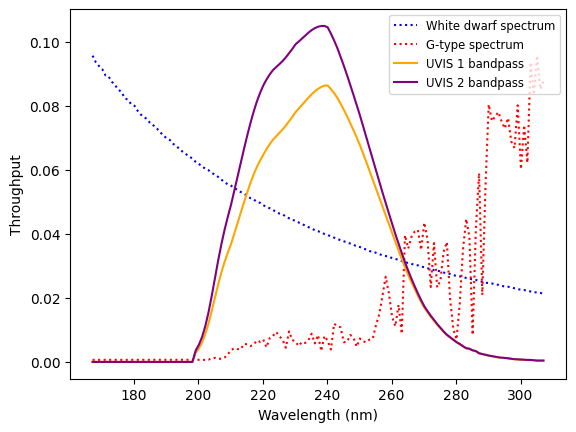

In [28]:
plt.figure()

plt.xlabel('Wavelength (nm)')
plt.ylabel('Throughput')

plt.plot(wl, spec_wd_scale, ls=':', c='blue', label='White dwarf spectrum')
plt.plot(wl, spec_g_scale, ls=':', c='red', label='G-type spectrum')
plt.plot(wl, bp1(wl), ls='-', c='orange', label='UVIS 1 bandpass')
plt.plot(wl, bp2(wl), ls='-', c='purple', label='UVIS 2 bandpass')

plt.legend(fontsize='small')

plt.show()

<a id="conclusion"></a>
## 4. Conclusions

Thank you for walking through this notebook. Now using WFC3 data, you should be more familiar with:

- Specify WFC3 bandpasses in `stsynphot` and define spectra with `synphot`.
- Computing WFC3 zeropoint values and an encircled energy correction.
- Renormalizing a spectrum and predict its effective stimulus in another filter.
- Finding the photometric transformation between two bandpasses.
- Finding the UV color term across the two UVIS chips for different spectral types.
- Plotting bandpasses and spectra.

#### Congratulations, you have completed the notebook!

<a id="resources"></a>
## Additional Resources
Below are some additional resources that may be helpful. Please send any questions through the [HST Helpdesk](https://stsci.service-now.com/hst).

- [WFC3 Website](https://www.stsci.edu/hst/instrumentation/wfc3)
- [WFC3 Instrument Handbook](https://hst-docs.stsci.edu/wfc3ihb)
- [WFC3 Data Handbook](https://hst-docs.stsci.edu/wfc3dhb)
    - see sections 9.5.2 for reference to this notebook
    
<a id="about"></a>
## About this Notebook

**Authors:** Aidan Pidgeon, Jennifer Mack; WFC3 Instrument Team

**Updated on:** 2021-09-14

<a id="cite"></a>
## Citations

If you use `numpy`, `astropy`, `synphot`, or `stsynphot` for published research, please cite the
authors. Follow these links for more information about citing the libraries below:

* [Citing `numpy`](https://numpy.org/citing-numpy/)
* [Citing `astropy`](https://www.astropy.org/acknowledging.html)
* [Citing `synphot`](https://synphot.readthedocs.io/en/latest/)
* [Citing `stsynphot`](https://stsynphot.readthedocs.io/en/latest/index.html)

<hr>
[Top of Page](#title)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/> 